<a href="https://colab.research.google.com/github/MatheusOrange211/Sirio_Libanes_ICU_Prediction/blob/main/2_Implementa%C3%A7%C3%A3o_de_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este trabalho foi desenvolvido por **Matheus Naranjo Corr√™a**.

# TESTANDO MODELOS PARA PREDI√á√ÉO DE PACIENTES QUE PRECISAR√ÉO DE UTI

Conforme solicitado pela dire√ß√£o do Hospital S√≠rio Liban√™s ao departamento de Tecnologia e Dados, apresentaremos abaixo uma proposta de solu√ß√£o para o seguinte problema:

**PROBLEMA**
> A pandemia da SARS-COVID-19 (popularmente conhecido como coronav√≠rus), vem causando grandes estresses nos sistemas de sa√∫des globais. Pa√≠ses com alta taxa de desenvolvimento v√™m sofrendo com a falta de leitos de Unidade de Terapia Intensiva (UTI) na interna√ß√£o de seus pacientes, levando equipes m√©dicas a terem que aplicar m√©todos de escolha severos, dando prioridade para os mais idosos e graves. Contudo, tais m√©todos n√£o auxiliam na resolu√ß√£o do problema dado a alta taxa de contamina√ß√£o existente, consequ√™ncia das ondas de infec√ß√£o que v√™m sendo causadas em um efeito de *onda* ao redor do mundo. <br>
Tal problema afeta tamb√©m pa√≠ses emergentes e subdesenvolvidos, que geralmente j√° possuem sistemas de sa√∫de superlotados, como no caso do Brasil. Infelizmente a superlota√ß√£o e a falta de leitos j√° sobrecarregou sistemas de v√°rios estados, como no caso do estado do Amazonas ([link da mat√©ria](https://g1.globo.com/am/amazonas/noticia/2021/01/14/secretario-de-saude-do-am-fala-que-estado-vive-colapso-do-plano-logistico.ghtml)), onde pacientes n√£o est√£o mais conseguindo acesso a UTI, assim como n√£o possuem equipamentos b√°sicos para a manuten√ß√£o de vida, como oxig√™nio. <br>
Com base nesses acontecimentos e at√© mesmo na preven√ß√£o de sobrecarga do sistema de sa√∫de das redes privadas, o Hospital S√≠rio-Liban√™s, refer√™ncia internacional em sa√∫de, busca prevenir e at√© mesmo predizer, com base em dados cl√≠nicos de seus pacientes, conforme forem sendo admitidos no ambiente hospitalar, a necessidade ou n√£o de interna√ß√£o nas UTIs nas pr√≥ximas horas. A ideia por tr√°s disso √© conseguir desenvolver um modelo de aprendizagem de m√°quina, conhecido com **Machine Learning**, que consiga auxiliar a junta m√©dica a tomar decis√µes referentes a necessidade ou n√£o de interna√ß√£o na UTI para aquele paciente, usando as boas pr√°ticas de programa√ß√£o e respeitando a Lei Geral da Prote√ß√£o de dados, conforme indica a lei federal Lei n¬∫ 13.709/2018.

Conforme analisado no notebook [Visualizando os Dados](https://github.com/MatheusOrange211/Sirio_Libanes_ICU_Prediction/blob/main/Visualizando_os_dados_Sirio_Libanes.ipynb), realizamos uma breve explora√ß√£o acerca dos dados fornecidos pela equipe de pesquisa do hospital, buscando entender o que fora nos enviado e como deveriamos ir trabalhando com os dados. Ficou decidido, com base em an√°lises (figura 4 - Interna√ß√£o em UTI pelo tempo de Admiss√£o: Precisou de UTI?), que o melhor janela de admiss√£o para se trabalhar era de at√© duas horas, uma vez que com ela, poderiamos tentar predizer mais cedo se o paciente necessitaria ou n√£o de interna√ß√£o na UTI.

Nessa segunda parte do projeto, optaremos por testar modelos de Machine Learning que ajudem no nosso problema de **classifica√ß√£o**. Inicialmente realizaremos a importa√ß√£o dos dados, sua limpeza (com fun√ß√µes criadas no notebook de visualiza√ß√£o de dados e outras), separa√ß√£o dos dados para treino e teste, o treinamento com alguns algoritmos de classifica√ß√£o e por fim sua valida√ß√£o e implementa√ß√£o.

# IMPORTANDO BIBLIOTECAS

Importaremos as bibliotecas b√°sicas usadas no desenvolvimento de an√°lises e tratamento de dados.

In [1]:
#Bibliotecas b√°sicas para an√°lises e visualiza√ß√£o de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#---------------------------------------------------------
#biblioteca para medi√ß√£o de tempo de execu√ß√µes dos modelos
import time 
#---------------------------------------------------------
#biblioteca de Modelos de Machine Learning e ferramentas de auxilio
#---------------------------------------------------------
from sklearn import model_selection
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
#---------------------------------------------------------
#biblioteca de realiza√ß√£o de M√âTRICAS
#---------------------------------------------------------
from sklearn import metrics
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from yellowbrick.features.importances import FeatureImportances
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import rocauc
#---------------------------------------------------------
#biblioteca de realiza√ß√£o de VALIDA√á√ÉO
#---------------------------------------------------------
from sklearn.model_selection import cross_validate
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import GridSearchCV

sns.set()
tempo_inicial = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Dados

Os dados fornecidos pela equipe de pesquisa do Hospital S√≠rio Liban√™s est√£o dispon√≠ves neste site: [Kaggle - S√≠rio-liban√™s](https://www.kaggle.com/S%C3%ADrio-Libanes/covid19). Uma explica√ß√£o dos dados j√° fora feita no notebook anterior, logo, passaremos para outra parte.


In [2]:
dados = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
dados.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...    WINDOW  ICU
0                         0            1  ...       0-2    0
1                         0            1  ...       2-4    0
2                         0            1  ...       4-6    0
3                         0            1  ...      6-12    0
4                         0            1  ...  ABOVE_12    1

[5 rows x 231 columns]

#FUN√á√ïES B√ÅSICAS - PREPARANDO OS DADOS

Abaixo temos fun√ß√µes que realizar√£o as limpezas iniciais dos dados

Fun√ß√£o usada para nos mostrar um breve resumo do nosso DataFrame (Usada no notebook Visualizando dados)

In [3]:
def resume_dataframe(dataset  : pd.DataFrame):
  
  data_nan = dataset.isnull().any().any() #retorno os dados Not a Number das colunas
  dataset_types = list (set(dataset.dtypes.values)) #com o set realizo um "filtro" removendo dados repetidos
  print("################ RESUMO B√ÅSICO ####################\n")
  #shape nos retorna uma tupla com dois valores, sendo um referente a linhas e o outro a coluna, respectivamente.
  print(f"Quantidade de inst√¢ncias: {dataset.shape[0]} (linhas)\nQuantidade de Atributos: {dataset.shape[1]} (colunas)\n")

  if data_nan:
    print(f"Possui dados NaN ? {data_nan}\nQuantidade de NaN totais: {dataset.isnull().sum().values.sum()}\n")
  else:
    print("N√£o h√° dados ausentes neste dataset\n")

  print(f"Tipos de  dados que temos :\n{dataset_types}\n")
  print("##################################################\n")

Essa fun√ß√£o divide nosso dataframe em 3 peda√ßos:
* features continuas (cont√©m grande parte das colunas de dados cl√≠nicos e NaN)
* features categoricas (as 13 primeiras colunas do nosso DataFrame)
* saida (as duas √∫ltimas colunas  - `WINDOW`e `ICU`)

Aplica-se groupby para agrupar cada valor da coluna `PATIENT_VISIT_IDENTIFIER` e nela, aplicar, para as colunas continuas selecionadas, os m√©todos `bfill`e `fill` para assim preencher os dados faltantesm uma vez que por serem relacionados a sa√∫de, n√£o apresentam, no geral, grandes discrep√¢ncias. Por √∫ltimo, agrupamos tudo novamente e reajustamos as colunas, por fim retornando os dados.

In [4]:
def preenche_tabela(dados):
    features_continuas_colunas = dados.iloc[:, 13:-2].columns
    features_continuas = dados.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False)[features_continuas_colunas]\
                          .fillna(method='bfill')\
                          .fillna(method='ffill')
    features_categoricas = dados.iloc[:, :13]
    saida = dados.iloc[:, -2:]
    dados_finais = pd.concat([features_categoricas, features_continuas, saida], ignore_index=True,axis=1)
    dados_finais.columns = dados.columns
    return dados_finais

Como trabalharemos com dados referentes a uma janela de at√© duas horas ap√≥s a admiss√£o, buscaremos filtrar e adicionar o valor 1 para pacientes que em algum momento foram para a UTI. Conforme explicado no notebook anterior (caso n√£o tenha visto):<br>
>Essa fun√ß√£o √© respons√°vel por realizar um filtro do qual busca-se manter valores referentes a janela de at√© 2 duas horas. Aplicando-se esta fun√ß√£o em um groupby, ocorrer√° que os dados ser√£o agrupados. Uma vez agrupados, faremos, por meio desta fun√ß√£o, uma verifica√ß√£o onde se qualquer uma das linhas conferidas for igual a 1, ou seja, se em um agrupamento do paciente **x** em todos os per√≠odos, se, por exemplo, na janela `0-4`, tivermos o valor de `ICU` == 1  (ou seja, um valor True), ser√° aplicado nessa linha, da primeira janela de admiss√£o (no caso, 0-2), o valor igual a 1 para a coluna ICU. Visualizando:


| WINDOW  |ICU   |   
|---------|------|
| 0-2        | 0  | 
|     2-4    |  0 | 
|       4-6  |   1| 
|       6-12  |   0| 

>Veja como na janela de 4-6 horas, o paciente j√° foi para UTI. o que esta fun√ß√£o far√° √© por o valor 1 logo na primeira Janela:

| WINDOW  |ICU   |   
|---------|------|
| 0-2        | 1  | 
|     2-4    |  0 | 
|       4-6  |   0| 
|       6-12  |   0|

>E assim, retornaremos apenas a primeira linha.

Essa fun√ß√£o agrupa todos os grupos de dados de um paciente e atribui o valor ICU == 1 na janela de at√© duas horas para assim pordemos trabalhar apenas com pacientes do quadro de at√© duas horas. Eis o motivo de termos jogado fora dados de pacientes com `ICU = 1` e `WINDOW = 0-2` logo de cara. Se a pessoa j√° entrou no hospital precisando de UTI, seus dados n√£o servir√£o para o modelo.

In [5]:
def prepare_window(rows):
    if(np.any(rows["ICU"])):
        rows.loc[rows["WINDOW"]=="0-2", "ICU"] = 1
    return rows.loc[rows["WINDOW"] == "0-2"]

Nessa fun√ß√£o, o que acontece √© que passando nosso dataframe (contendo NaN e strings - n√£o se preocupe quanto a isso), filtramos as colunas e ficamos apenas com as que s√£o num√©ricas. Depois passamos o m√©todo de correla√ß√£o e damos um .`pipe()` (com ele, a gente pode aplicar fun√ß√µes no DataFrame, por exemplo). Aplicamos um lambda e passamos um `np.tril()`. O que ele far√° √© retornar os valores maiores que -1 numa matrix de diagonal `k-therizada` (Leia a [documenta√ß√£o](https://numpy.org/doc/stable/reference/generated/numpy.tril.html) para um maior aprofundamento). Criamos as colunas e index e empilhamos as colunas que s√£o geradas durante a correla√ß√£o. Passando outro `pipe()`, retornamos apenas os valores que s√£o maiores que o par√¢metro que passamos na declara√ß√£o da fun√ß√£o. Por √∫ltimo damos um `query()` para realizar um filtro em valores que est√£o na coluna `level_0` e n√£o em `level_1` .

In [6]:
def correlated_columns_harrison(dataset, threshold = 0.95):
  df = dataset[dataset.describe().columns]  #fica-se apenas com as colunas que possuem valores num√©ricos
  return (
      df.corr().pipe(lambda df1: pd.DataFrame(np.tril(df1,k=-1),  
                                              columns = df.columns,
                                              index = df.columns,
                                              )
      ) 
      .stack()
      .rename("pearson")
      .pipe(
          lambda s: s[s.abs() >threshold].reset_index()
      )
      .query("level_0 not in level_1")
  )

Nessa fun√ß√£o, iremos criar uma lista com as colunas com valores correlacionados que ser√£o descartadas. Para as duas colunas que ela possui, iremos dropar valores repetidos e adicionar os que sobram a uma lista que √© retornada.

In [7]:
def descartar_colunas_correlacionadas(dataset: pd.DataFrame):
    colunas_com_muita_correlacao = [] #cria-se uma lista vazia 
    for valor in dataset['level_0'].drop_duplicates().values: #dropa-se o nome duplicados de colunsa presentes na coluna level_0
      colunas_com_muita_correlacao.append(valor) #adiciona-se os valores na lista
    for valor in dataset['level_1'].drop_duplicates().values:#dropa-se o nome duplicados de colunsa presentes na coluna level_1
      colunas_com_muita_correlacao.append(valor)  #adiciona-se os valores na lista
    return colunas_com_muita_correlacao

T√©cnica elaborada por Thiago Gon√ßalves e Alan Spadinni, conhecida popularmente na literatura alur√≠stica de programa√ß√£o como **tecnica Gondinni**, que consiste na cria√ß√£o de correla√ß√£o de todas as linhas e, com exce√ß√£o das primeiras 4 e √∫ltimas duas colunas do dataframe,  gerar a correla√ß√£o  e transforma√ß√£o dos valores para absoluto. Depois busca-se selecionar os valores do *tri√¢ngulo superior* que foram gerados nessa matriz de correla√ß√£o, todos os valores s√£o transformados para 1s, e depois aplicamos um k = 1 (que gera a divis√£o dos valores do tri√¢ngulo superior),, √© que aplicamos uma transforma√ß√£o para True nos valores que antes eram 1 , e False para os valores  0s. Dessa forma, quando aplicado o `where`, conseguiremos pegar os valores da matriz superior e assim termos as colunas correlacionas, sem ter a parte do tri√¢ngulo inferior, que funciona como um espelho. <BR>
Por √∫ltimo, realizando um list comprehenssion, buscaremos todas as colunas maiores que `valor_corte` e adicionamos a `excluir` que ser√°  usada para dropar posteriormente todas as colunas maiores que o valor setado para `valor_corte`.

<img src = "https://static.mundoeducacao.uol.com.br/mundoeducacao/conteudo/matriz-triangular-superior.jpg">

Acima temos um exemplo de uma matriz onde de azul s√£o os valores da diagonal (em azul) que sempre ser√£o iguais a 1, pois s√£o as mesmas colunas refletidas uma na outras , como por exemplo  COLUNA_1 X COLUNA_1 , onde ambas s√£o a mesma coluna, logo √© obvio que ir√£o ter correla√ß√£o perfeita igual a 1. <br>
Em preto, temos o chamado tri√¢ngulo superior, que √© o que desejamos manter, e em vermelho, o chamado tri√¢ngulo inferior, que ser√° descartado por possuir os mesmos resultados do outro tri√¢ngulo.

In [8]:
def remove_corr_var(dados,valor_corte = .95):

  matriz_corr = dados.iloc[:,4:-2].corr().abs()
  matrix_upper = matriz_corr.where(np.triu(np.ones(matriz_corr.shape),k=1).astype(np.bool))
  excluir  = [ coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > valor_corte)]

  return dados.drop(excluir,axis=1)

Essa fun√ß√£o ir√° executar os modelos:
* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* KNeighborsClassifier
* GaussianNB
* SVC
* RandomForestClassifier
* XGBClassifier

Passamos apenas o dataset que dever√° ser particionado em treino e teste, depois com um la√ßo de repeti√ß√£o, iremos obter os resultados de cada modelo para determinado conjunto de dados passados. A ideia √© apenas ter uma vis√£o inicial de como os dados est√£o funcionando, se logo de cara, j√° est√£o treinando bem, por isso n√£o √© passado par√¢metros mais espec√≠ficos para cada modelo, o que pode ocasionar a sa√≠da de **WARNINGS**. Contudo, pelos motivos explicados, isso √© previsto. Por fim, temos a sa√≠da de uma lista com os valores AUC, desvio padr√£o (STD), e o tempo de execu√ß√£o.

In [9]:
def rodar_varios_modelos(dataset):
  
  x_columns = dataset.columns
  x_columns = x_columns.drop(["PATIENT_VISIT_IDENTIFIER"])
  y = dataset["ICU"]
  x = dataset[x_columns].drop(["ICU"], axis=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  results = []
  np.random.seed(415645)
  for model in [DummyClassifier,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,GaussianNB,
                SVC,RandomForestClassifier,XGBClassifier]:

                start_time  = time.time()

                model_used = model()

                kfold = StratifiedKFold(n_splits=5,shuffle=True)
                val_score = model_selection.cross_val_score(model_used,x,y,scoring="roc_auc",
                                                            cv = kfold)
                
                results.append(f"{model.__name__:22} AUC:\
                {val_score.mean():.3f} STD: {val_score.std():.2f}     Tempo execu√ß√£o: {time.time() - start_time} seconds")

  return results

Esta fun√ß√£o recebe um conjunto de dados, e dela realiza a manipula√ß√£o de dividir os dados em treinos e testes. Primeriramente agrupamos os nomes de todas as colunas do dataset, para depois dividir em um y que recebe apenas os valores que desejamos ter como resposta, e no x, o conjunto de dados que usaremos para testes e treinamentos. Remove-se as colunas que podem conter vazamento de informa√ß√µes e com valores que podem prejudicar o modelo. Por fim, aplica-se o  `train_test_split` que ir√° realizar cortes no nosso conjunto de dados e ir√° realizar essas divis√µes em X treino e testes  e Y treino e testes.

In [10]:
def criar_treino_teste(dataset):
  np.random.seed(727356)
  x_columns = dataset.columns
  y = dataset["ICU"]
  x = dataset[x_columns].drop(["ICU","PATIENT_VISIT_IDENTIFIER"], axis=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  return  x_train, x_test, y_train, y_test

Essa fun√ß√£o realiza o processo de split dos daddos, realizando primeiramente um embaralhamento nos dados para que possamos ter uma aleatoriedade de dados que simule um processo real. Depois realizamos as divis√µes no conjunto de dados para teste e treino. Com o auxilio do `RepeatedStratifiedKFold` iremos embaralhar, fatiar e repetir este processos $k$ numero de vezes que forem adequadas. <BR>
Iremos ainda aplicar o `cross_validate` para realizar o cruzamento destes dados. Ele ir√° seus resultados no formato de dicion√°rio, do qual printaremos uma m√©dia tanto para o `score_test`, `train_score`, que s√£o as respectivas pontua√ß√µes de teste e treino, assim como o desvio padr√£o gerado pelo `test_score`

In [11]:
def roda_modelo_cv(modelo, dados,n_splits,n_repeats):


  np.random.seed(434876)
  #como n√£o temos a op√ß√£o shuffle aqui,
  #est√° se torna uma forma de embaralhar dados
  dados = dados.sample(frac=1).reset_index(drop=True) #reseta index gerados


  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU"], axis=1)

  cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
  resultados = cross_validate(modelo, x, y, cv=cv,scoring='roc_auc',return_train_score=True)

  auc_medio = np.mean(resultados['test_score'])
  auc_medio_treino = np.mean(resultados['train_score'])
  
  
  print(f"AUC: {auc_medio} -  {auc_medio_treino}")
  return auc_medio, auc_medio_treino

Essa fun√ß√£o ir√° nos retornar duas informa√ß√µes importantes!<br>
A primeira, que √© o valor AUC gerado pelo modelo que passamos e o outro, ser√° o Classification Report que cont√©m informa√ß√µes importantes a cerca de m√©tricas como Precis√£o, Recall e F1-Score, para as classes que ser√£o classificadas. Primeiro, passamos apenas o modelo e os conjunto de dados, depois, eles ser√£o tratados, criando um **y** apenas com os dados de "resposta". Criamos as vari√°veis de treino e teste, depois as treinamos. Depois predizemos. Passamos um m√©todo de predi√ß√£o probabil√≠stica, que ser√° fundamental para que se consiga medir o valor AUC daquele modelo. Por fim, printamos, al√©m da pontua√ß√£o AUC, as m√©tricas das classes, passando os dados reais (y_test) e a nossa predi√ß√£o.

In [12]:
def roda_modelo(modelo, dados):
  np.random.seed(154145)
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU"], axis=1)

  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)

  
  modelo.fit(x_train, y_train)

  predicao = modelo.predict(x_test)
  prob_predic = modelo.predict_proba(x_test)
  
  auc = roc_auc_score(y_test,prob_predic[:,1])
  print(f"AUC: {auc}")
  print("\nClassification Report")
  print(classification_report(y_test,predicao))


A fun√ß√£o plota um gr√°fico com as m√©tricas roc_auc, passando o modelo de Machine Learning, o dataset e o nome do dataset usado para ser plotado posteriormente.

In [13]:
def plotar_roc_auc(modelo,dados,name_dataset):
  np.random.seed(165488)
  
  
  # x_columns = dados.columns
  # y = dados["ICU"]
  # x = dados[x_columns].drop(["ICU"], axis=1)
  # x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
  x_train, x_test, y_train, y_test = criar_treino_teste(dados)
  #Separamos os dados de treino e teste

  #treinamos
  modelo.fit(x_train, y_train)
  #predizemos 
  predicao = modelo.predict(x_test)
  #plotamos a figura na qual ROCAUC ir√° realizar os calculos, pedindo apenas que
  #passemos o modelo
  fig, aux = plt.subplots(figsize=(9,9))
  roc_viz = rocauc.ROCAUC(modelo)
  #realizamos tamb√©m os calculos de pontua√ß√£o que s√£o apresentados na legenda do gr√°fico
  roc_viz.score(x_test,y_test)
  plt.legend()
  plt.title(f"Curva ROC para {name_dataset} - MODELO {modelo.__class__.__name__}")
  plt.show()

Busca-se descobrir a acur√°cia de certo modelo para certo conjunto de dados. Para evitar a repeti√ß√£o de c√≥digo desnecess√°ria, cria-se essa fun√ß√£o.

In [14]:
def saber_acuracia (dados, modelo):
  x_train,x_test,y_train,y_test = criar_treino_teste(dados)
  modelo.fit(x_train,y_train)
  predicao_dados = modelo.predict(x_test)
  #separa-se os dados aqui para evitar erros externos.
  print(f"A acur√°cia do Modelo Log√≠stico para dados_limpos √© de : {(accuracy_score(y_test, predicao_dados))*100 :.2f} %")

Criamos uma matriz de confus√£o que mostra o desempenho de acertos e erros de cada modelo para as classes de dados. O gr√°fico √© gerado pelo pr√≥prio `plot_confusion_matrix`.

In [15]:
def plotar_confusion_matrix (dados, modelo):
  x_train,x_test,y_train,y_test = criar_treino_teste(dados)
  modelo.fit(x_train,y_train)
  predicao_dados = modelo.predict(x_test)
  #realizamos a divis√£o e treinamento dos dados para evitar qualquer erro externo

  #ent√£o passamos o modelo usado, os dados de teste predizidos, os dados reais e
  #as respectivas labels para 0 = n√£o internar e 1 = Internar
  figura = plot_confusion_matrix(modelo,x_test,y_test,display_labels=['N√£o Internar','Internar'])

Mostra quais colunas est√£o sendo "mais importantes" para aquele modelo, por meio de uma pontua√ß√£o.

In [16]:
def plotar_FeatureImportances (dados, modelo):
  x_train,x_test,y_train,y_test = criar_treino_teste(dados)
  modelo.fit(x_train,y_train)
  predicao_dados = modelo.predict(x_test)
  #depois de separado os dados de treino e teste e depois dos treinamentos e predi√ß√µes
  #criamos um grafico
  fig,ax = plt.subplots(figsize=(15,35))
  #passamos o modelo que ir√° ser usados para detectar as colunas "mais importantes"
  fi_viz = FeatureImportances(modelo)
  #realizamos um teste com as configura√ß√µes instanciadas na vari√°vel anterior
  fi_viz.fit(x_test,y_test)
  #mostramos
  fi_viz.poof()

A fun√ß√£o gera a chamada curva de valida√ß√£o, buscando descobrir como determinado hiperpar√¢metro n√∫merico se comporta conforme passamos um la√ßo de repeti√ß√£o e plotamos ao longo de cada itera√ß√£o.

><font color='red'> **OBSERVA√á√ÉO**: **OS VALORES DO EIXO-Y N√ÉO INICIAM NO VALOR 0 , POIS OS GR√ÅFICOS S√ÉO GERADOS AUTOMATICAMENTE E,PRESSUP√ïE-SE QUE MOSTRAR A PARTIR DE UM VALOR IGUAL A 0.6 OU 60% (COMO NO NOSSO CASO)  TORNA A VISUALIZA√á√ÉO MELHOR PARA OS RESULTADOS. ISSO SE REFLETIR√Å EM TODOS OS PLOTS DE CURVA DE VALIDA√á√ÉO E CURVA DE APRENDIZAGEM** </font>

In [17]:
def curva_validacao(modelo,dados,n_range_max,param):
  np.random.seed(35468)
  x_train,x_test,y_train,y_test = criar_treino_teste(dados)

  #separado os dados, iremos plotar uma gr√°fico
  fig,ax = plt.subplots(figsize=(12,6))
  #validationcurve cria uma esp√©cie de la√ßo for onde o modelo √© treinado com 
  #certa configura√ß√£o e com o par√¢metro que passamos sendo modificados n_range_max
  # vezes, come√ßando de 1. 
  vc_viz =  ValidationCurve(modelo,param_name= param,
                            param_range = np.arange(1,n_range_max),
                            cv = 10,
                            n_jobs = -1)
  #n_jobs  = -1 significa que iremos usar todas as threads do processador para 
  #conseguir eficiencia
  vc_viz.fit(x_train,y_train)
  vc_viz.poof()

A fun√ß√£o primeiramente ir√° gerar os dados de treino e de teste, para que depois, possamos plotar uma curva de aprendizagem comparativa entre a valida√ß√£o cruzada e os dados de treino. Ser√° plotado um gr√°fico de linhas mostrando como o modelo se comporta com uma certa quantidade de dados.

In [18]:
def curva_aprendizagem(modelo,dados):
  np.random.seed(43545)
  x_columns = dados.columns
  y = dados["ICU"]
  x = dados[x_columns].drop(["ICU"], axis=1)
  x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y)
  
  # depois de tratar, e separar os dados, criamos um gr√°fico 
  fig,ax = plt.subplots(figsize=(12,6))
  #Passamos o modelo e o valor cv referente a frequencia de repeti√ß√£o da valida√ß√£o
  #cruzada estimada para 10
  lc3_viz =  LearningCurve(modelo,cv = 10)
  #treinamos e plotamos
  lc3_viz.fit(x_train,y_train)
  lc3_viz.poof()

Esta fun√ß√£o utilizar√° a o `GridSearchCV` para ir treinando um dicion√°rio de valores que queremos testar e no fim, retornar√° o tempo que levou para executar e tamb√©m o melhor modelo para o nosso conjunto de dados passado.

In [110]:
def buscar_melhor_parametro(dados_usados,modelo_usado,param_grid):
  #inicia o time de tempo de execu√ß√£o
  start_time = time.time()
  #a fun√ß√£o retorna os dados treinados e de teste j√° separados e tratados
  x_train,x_test,y_train,y_test = criar_treino_teste(dados_usados)
  #essa fun√ß√£o aplica ent√£o a procura pelo melhor modelo para esse conjunto de 
  #dados. Passamos o modelo que usaremos, os par√¢metros que queremos verificar neste
  #modelo, al√©m da pontua√ß√£o que usamos para medir a qualidade gerada
  grid_search = GridSearchCV(modelo_usado, param_grid, scoring="roc_auc")
  #come√ßaremos a treinar os modelos para os valores de treino
  grid_search.fit(x_train, y_train)


  #o modelo ent√£o buscar√° aquele que melhor desempenhar
  melhor_modelo = grid_search.best_estimator_ 
  #ele buscar√° ent√£o os melhores par√¢metros e a melhor pontua√ß√£o
  grid_search.best_params_, grid_search.best_score_
  #printamos ent√£o o tempo de execu√ß√£o, a pontua√ß√£o dos dados de treino, teste
  # e os melhores par√¢metros do modelo.
  
  print( f"Tempo execu√ß√£o: {time.time() - start_time} segundos\n")
  print(f"TREINO :{grid_search.score(x_train,y_train):.2f} \nTESTE :{grid_search.score(x_test,y_test):.2f} ")
  print(f"\n\n{melhor_modelo}")

# PREPARANDO O DATAFRAME

Antes de aplicar os modelos e ver qual possui melhor custo benef√≠cio, vamos preparar nosso dataframe

Cria-se a vari√°vel que armazaner√° os dados formatados e previamente, limpos. Aqui, iremos tamb√©m, realizar uma query por todas as colunas as linhas que possuem `WINDOW=='0-2' and ICU==1`, pois essas, ser√£o eliminadas de imediado, dados que seus dados n√£o nos servem. Realizamos um dropna para remover dados NaN restantes, caso haja.

In [19]:
dados_limpos = preenche_tabela(dados)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos = dados_limpos.dropna()
dados_limpos.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  ...    WINDOW  ICU
0                         0            1  ...       0-2    0
1                         0            1  ...       2-4    0
2                         0            1  ...       4-6    0
3                         0            1  ...      6-12    0
4                         0            1  ...  ABOVE_12    1

[5 rows x 231 columns]

Possu√≠mos dados Categ√≥ricos em nosso conjunto de dados. Logo, ainda precisamos limpar mais, antes de come√ßarmos a aplicar algum modelo. As colunas `AGE_PERCENTIL`e `WINDOW` possuem informa√ß√µes do tipo **String** que precisam ser categorizadas de forma a n√£o gerar uma discrep√¢ncia alta de valores e assim influenciar de forma errada nosso modelo. Digo isso pois, a aplica√ß√£o de um `.astype("category").cat.codes` resultaria em valores iguais a 5,3, 2 e assim em diante, e nossos est√£o normalizados. Buscando resolver isso, aplico um `pd.get_dummies` para que seja criada uma coluna para cada valor, sendo preenchido de 0s e 1s. Observe tamb√©m que antes de realizar isso, na linha acima, em `apply`, aplico a fun√ß√£o `prepare window`. Ficamos ent√£o apenas com o quadro de at√© duas horas ap√≥s a admiss√£o.

In [20]:
dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_limpos = pd.get_dummies(dados_limpos) 
dados_limpos.head()

PATIENT_VISIT_IDENTIFIER  ...  WINDOW_0-2
PATIENT_VISIT_IDENTIFIER                               ...            
0                        0                          0  ...           1
2                        10                         2  ...           1
3                        15                         3  ...           1
4                        20                         4  ...           1
5                        25                         5  ...           1

[5 rows x 240 columns]

Antes de iniciar a aplica√ß√£o dos modelos de Machine Learning, vejamos o que temos nos dados agora:

In [21]:
resume_dataframe(dados_limpos)

################ RESUMO B√ÅSICO ####################

Quantidade de inst√¢ncias: 352 (linhas)
Quantidade de Atributos: 240 (colunas)

N√£o h√° dados ausentes neste dataset

Tipos de  dados que temos :
[dtype('int64'), dtype('float64'), dtype('uint8')]

##################################################



Possuimos ent√£o 240 colunas no total. Entretanto talvez n√£o seja necess√°rio o uso de todas essas colunas, dado que muitas colunas podem vir a atrapalhar as predi√ß√µes. Criarei dois dataframes, onde ambos buscar√£o excluir dados com alta correla√ß√£o, mas onde ambos realizam tal tarefa de forma diferente. 

### 2 M√âTODOS PARA EXCLUIR DADOS CORRELACIONADOS

**Excluindo-se dados correlacionados com a t√©cnica de Matt Harisson**

In [22]:
#cria-se um dataframe com 3 colunas(duas onde os valores s√£o o nome de colunas e a terceira com os valores de correla√ß√£o > .95)
dados_correlacionados = correlated_columns_harrison(dados_limpos,.95)

#filtra-se de ambas as colunas que possuem nomes aqueles que n√£o se repetem, gerando uma lista
excluir = descartar_colunas_correlacionadas(dados_correlacionados)

#descarta-se as colunas com alta correla√ß√£o
dados_limpos_sem_corr_tipo_1 = dados_limpos.drop(excluir,axis=1)

In [23]:
resume_dataframe(dados_limpos_sem_corr_tipo_1)

################ RESUMO B√ÅSICO ####################

Quantidade de inst√¢ncias: 352 (linhas)
Quantidade de Atributos: 64 (colunas)

N√£o h√° dados ausentes neste dataset

Tipos de  dados que temos :
[dtype('int64'), dtype('float64'), dtype('uint8')]

##################################################



**Excluindo-se dados correlacionados com a t√©cnica de Thiago Gon√ßalves e Alan Spadinni: t√©cnica Gondinni**

In [24]:
dados_limpos_sem_corr_tipo_2 = remove_corr_var(dados_limpos)

In [25]:
resume_dataframe(dados_limpos_sem_corr_tipo_2)

################ RESUMO B√ÅSICO ####################

Quantidade de inst√¢ncias: 352 (linhas)
Quantidade de Atributos: 109 (colunas)

N√£o h√° dados ausentes neste dataset

Tipos de  dados que temos :
[dtype('int64'), dtype('float64'), dtype('uint8')]

##################################################



Nota-se que em um m√©todo, temos 64 colunas, no outro, 109. 


### DADOS A SEREM TREINADOS INICIALMENTE

>Por fim, temos tr√™s vari√°veis referentes aos dados de pacientes:

* `DADOS_LIMPOS` = **POSSUE TODAS AS COLUNAS (240)**
* `DADOS_LIMPOS_SEM_CORR_TIPO_1` = **POSSUE COLUNAS SEM ALTA CORRELA√á√ÉO COM BASE NA T√âCNICA DE MATT HARISSON (64)**
* `DADOS_LIMPOS_SEM_CORR_TIPO_2` = **POSSUE COLUNAS SEM ALTA CORRELA√á√ÉO COM BASE NA T√âCNICA GONDINNI (109)**

>Todas as vari√°veis est√£o sem dados Not a Number (NaN) e ser√£o usadas em todos os modelos para que possamos ver qual se desempenhar√° melhor.

# IMPLEMENTA√á√ÉO DE MODELOS DE APRENDIZAGEM DE M√ÅQUINA

Nosso projeto consiste na classifica√ß√£o de pacientes que devem ir para UTI ou n√£o, com base em uma s√©rie de dados referentes a seus exames e sinais vitais. Para isso, nada melhor do que aplicar t√©cnicas de aprendizagem de m√°quinas voltadas para classifica√ß√£o. Por conceito temos:

>Os modelos de ML para problemas de classifica√ß√£o bin√°ria preveem um resultado bin√°rio (uma de duas classes poss√≠veis).<br> ([link para refer√™ncia](https://docs.aws.amazon.com/pt_br/machine-learning/latest/dg/types-of-ml-models.html))

No nosso caso, utilizarei os seguintes modelos:

* DummyClassifier
* LogisticRegression
* DecisionTreeClassifier
* KNeighborsClassifier
* GaussianNB
* SVC
* RandomForestClassifier
* XGBClassifier

Contudo, apesar de uma breve explica√ß√£o sobre cada um, n√£o trabalharemos com todos. Iremos apenas inicialmente rod√°-los e dependendo do desempenho, ficaremos com 4 ou 5 modelos para trabalhar. Logo, algumas coisas a se levar em conta:

* Sua precis√£o, recall e acuc√°cia;
* Para que o modelo possa ser usado, ele deve possuir um custo-benef√≠cio bom o suficiente para entrar em produ√ß√£o. De nada serve um modelo 100% bom em classificar, mas que leva 2 horas para fazer isso (levando em conta que os dados crescer√£o com o tempo).



Testando inicialmente os conjunto de dados com os modelos, mas sem especificar os par√¢metros, temos:<br>
***
***
**OBSERVA√á√ÉO**: desconsiderar avisos de warning
***
***

Rodando primeiramente para `dados_limpos`

In [26]:
resultados_dados_limpos = rodar_varios_modelos(dados_limpos)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

Rodando para `dados_limpos_sem_corr_tipo_1`


In [27]:
resultados_sem_corr_tipo_1 = rodar_varios_modelos(dados_limpos_sem_corr_tipo_1)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

rodando em `dados_limpos_sem_corr_tipo_2`

In [28]:
resultados_sem_corr_tipo_2 =rodar_varios_modelos(dados_limpos_sem_corr_tipo_2)

/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarn

#### Resultados iniciais para v√°rios modelos e quais ser√£o usados

# EXPLICAR PAR√ÇMETROS AUC STD E TEMPO DE EXECU√á√ÉO

Abaixo, iremos conferir melhor a quest√£o de desempenho dos modelos que foram treinados. Todos eles servem para classifica√ß√£o, contudo, podem n√£o ser o melhor para o que √© proposto no nosso projeto. Tendo isso em mente, algumas m√©tricas iniciais s√£o levadas em conta e que podem fazer a diferen√ßa.
<br>
O AUC - Area Under Curve ou √°rea sobre a curva, mede a capacidade do modelo de prever uma pontua√ß√£o maior de exemplos positivos em compara√ß√£o com os exemplos negativos. Como ela n√£o depende do corte da pontua√ß√£o, voc√™ poder√° ter uma ideia da precis√£o da previs√£o do modelo a partir da m√©trica AUC, sem escolher um limite.
<br>
J√° o STD ou o desvio padr√£o √© uma medida que indica a dispers√£o dos dados dentro de uma amostra com rela√ß√£o √† m√©dia. Assim, quando se calcula o desvio padr√£o juntamente com a m√©dia de diferentes grupos, obt√©m-se mais informa√ß√µes para avaliar e diferenciar seus comportamentos.
<br>
Por fim, o tempo de execu√ß√£o servir√° para termos uma no√ß√£o de quanto tempo est√° sendo levado para divis√£o de dados, treino, predi√ß√£o e teste em cada modelo. Isso √© de fundamental import√¢ncia e ser√° determinante mais pra frente, quando nossa base de dados se tornar maior e mais complexa. Afinal, do que adianta um modelo 100% preciso, mas que demora in√∫meras horas para auxiliar em algo t√£o emergencial como saber se um paciente necessita ou n√£o de UTI?


Vejamos ent√£o como o filtro de dados realizados, auxiliar√£o no resultado final dos modelos.

In [29]:
resultados_dados_limpos

['DummyClassifier        AUC:                0.502 STD: 0.06     Tempo execu√ß√£o: 0.027831077575683594 seconds',
 'LogisticRegression     AUC:                0.740 STD: 0.03     Tempo execu√ß√£o: 0.3126702308654785 seconds',
 'DecisionTreeClassifier AUC:                0.619 STD: 0.03     Tempo execu√ß√£o: 0.15085601806640625 seconds',
 'KNeighborsClassifier   AUC:                0.655 STD: 0.06     Tempo execu√ß√£o: 0.10971927642822266 seconds',
 'GaussianNB             AUC:                0.744 STD: 0.03     Tempo execu√ß√£o: 0.03624272346496582 seconds',
 'SVC                    AUC:                0.769 STD: 0.08     Tempo execu√ß√£o: 0.20143914222717285 seconds',
 'RandomForestClassifier AUC:                0.788 STD: 0.01     Tempo execu√ß√£o: 1.066347360610962 seconds',
 'XGBClassifier          AUC:                0.779 STD: 0.02     Tempo execu√ß√£o: 1.3477206230163574 seconds']

In [30]:
resultados_sem_corr_tipo_1

['DummyClassifier        AUC:                0.502 STD: 0.06     Tempo execu√ß√£o: 0.016945600509643555 seconds',
 'LogisticRegression     AUC:                0.712 STD: 0.09     Tempo execu√ß√£o: 0.19057917594909668 seconds',
 'DecisionTreeClassifier AUC:                0.589 STD: 0.03     Tempo execu√ß√£o: 0.042218923568725586 seconds',
 'KNeighborsClassifier   AUC:                0.670 STD: 0.04     Tempo execu√ß√£o: 0.06554746627807617 seconds',
 'GaussianNB             AUC:                0.690 STD: 0.04     Tempo execu√ß√£o: 0.028432369232177734 seconds',
 'SVC                    AUC:                0.694 STD: 0.06     Tempo execu√ß√£o: 0.08236527442932129 seconds',
 'RandomForestClassifier AUC:                0.682 STD: 0.05     Tempo execu√ß√£o: 0.7974598407745361 seconds',
 'XGBClassifier          AUC:                0.731 STD: 0.04     Tempo execu√ß√£o: 0.3098764419555664 seconds']

In [31]:
resultados_sem_corr_tipo_2

['DummyClassifier        AUC:                0.502 STD: 0.06     Tempo execu√ß√£o: 0.021927356719970703 seconds',
 'LogisticRegression     AUC:                0.750 STD: 0.04     Tempo execu√ß√£o: 0.23187708854675293 seconds',
 'DecisionTreeClassifier AUC:                0.611 STD: 0.02     Tempo execu√ß√£o: 0.08295416831970215 seconds',
 'KNeighborsClassifier   AUC:                0.698 STD: 0.06     Tempo execu√ß√£o: 0.0687103271484375 seconds',
 'GaussianNB             AUC:                0.731 STD: 0.03     Tempo execu√ß√£o: 0.028757572174072266 seconds',
 'SVC                    AUC:                0.754 STD: 0.09     Tempo execu√ß√£o: 0.11360883712768555 seconds',
 'RandomForestClassifier AUC:                0.793 STD: 0.03     Tempo execu√ß√£o: 0.9162993431091309 seconds',
 'XGBClassifier          AUC:                0.776 STD: 0.02     Tempo execu√ß√£o: 0.5834300518035889 seconds']

Ao que tudo indica, os modelos performaram melhor em:
* `dados_limpos` (onde permaneceram a maior parte das colunas)
* `dados_limpos_sem_corr_tipo_2` (Segundo o m√©todo GONDINNI)

Al√©m disso, no geral, os modelos que obtiveram bons resultados :
* Logistic Regression
* Random Forest Classifier
* XGBClassifier


Portanto, analisaremos estes modelos mais a fundo, apresentando uma breve explica√ß√£o a cerca de seu funcionamento, e realizaremos alguns testes referentes a acerto, tempo de execu√ß√£o e processamento.

# üìäüìñ EXPLICANDO MODELOS ESCOLHIDOS

Dado os modelos escolhidos, explicarei inicialmente um pouco de cada um, buscando n√£o extender demais o tema para n√£o perdermos o foco. Logo depois, iremos escolher quais resolvem melhor nosso problema, testar com tais modelos e determinar quais se sa√≠ram melhores, para no final, decidirmos.

## üìï Logistic Regression

Antes de explicar a **logistic regression** ou **regress√£o logistica**, √© necess√°rio compreender um pouco sobre regress√£o Linear. A **regress√£o Linear** √© o processo de tra√ßar uma reta atrav√©s dos dados que s√£o gerados atrav√©s de um diagrama de dispers√£o. A partir da√≠, buscamos tra√ßar uma equa√ß√£o que gere uma reta que nos mostre a rela√ß√£o existente nos dados.<br>
A equa√ß√£o usada para buscar tal reta √© :
\begin{equation}
\hat y = \alpha + \beta x + e
\end{equation}

onde:
* **x** : Vari√°vel independente que busca explicar y
* **y**: Vari√°vel dependente a ser prevista
* $\alpha$ e $\beta$ : s√£o par√¢metros de distribui√ß√£o
* $e$ : erros de medida

Abaixo, temos um exemplo de regress√£o linear. Os pontos em vermelho representam nossos dados dispersos ao longo de um plano cartesiano em $R^2$ e em azul, temos uma reta que √© gerada a partir de uma fun√ß√£o que n√≥s criamos derivada da equa√ß√£o de regress√£o linear.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/LinearRegression.svg/1200px-LinearRegression.svg.png" width=480>


Assim, supondo que nosso objetivo fosse, a partir de uma base de dados, classificar a qualidade dos estudos de alunos de acordo com as horas de estudo e suas respectivas notas, poderiamos aplicar a regress√£o linear facilmente e assim buscar a probabilidade do aluno tirar uma nota $y$ baseado nas $x$ horas que ficou estudando.

Contudo, e se busc√°ssemos saber qual a probabilidade de uma pessoa comprar um produto. Nossa vari√°vel resposta seria *comprar* e *n√£o-comprar*. Com base em algumas vari√°veis como idade, salario e afins, como poderiamos classificar as pessoas que comprariam ou n√£o o nosso produto, ou no caso do projeto, quais ir√£o ou n√£o precisar de UTI. Esse √© um caso em que a regress√£o linear n√£o nos ajudaria.

Nesse caso, podemos ent√£o, aplicar uma regress√£o logistica, que apesar do nome, √© na verdade um modelo linear de classifica√ß√£o. Neste modelo, as probabilidades que descrevem os poss√≠veis resultados de um √∫nico ensaio s√£o modeladas com o aux√≠lio de uma fun√ß√£o log√≠stica.<br>
Equa√ß√£o da fun√ß√£o log√≠stica:
\begin{equation}
  f(x)={\frac {L}{1+e^{-k(x-x_{0})}}}\end{equation}

onde:
* $x_0$: valor do ponto m√©dio do sigmoide;
* $L$ : valor m√°ximo da curva;
* $K$: a taxa de crescimento log√≠stico ou a inclina√ß√£o da curva.

Visualmente a fun√ß√£o log√≠stica √© assim:<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/320px-Logistic-curve.svg.png">

A regress√£o log√≠stica √© um recurso que nos permite estimar
a probabilidade associada √† ocorr√™ncia de determinado
evento em face de um conjunto de vari√°veis explanat√≥rias.
Como caracter√≠stica, Busca estimar a probabilidade da vari√°vel
dependente assumir um determinado valor em
fun√ß√£o dos conhecidos de outras vari√°veis e os resultados da an√°lise ficam contidos no
intervalo de zero a um.
<br>
Na regress√£o log√≠stica, a probabilidade de ocorr√™ncia de um
evento pode ser estimada diretamente. No caso da vari√°vel
dependente
Y assumir apenas dois poss√≠veis estados (1 ou 0)
e
haver um conjunto de
p vari√°veis independentes
X1 , X2 , ... , Xp
, o
modelo de regress√£o log√≠stica pode ser escrito da seguinte forma:

\begin{equation}
P\big(Y = 1 ) = \frac{1}{1 + e^{-g(x)}}
\end{equation}

onde: 
\begin{equation}
g\big(x\big) = B_0 + B_1X_1 + ... B_pX_p
\end{equation}

Abaixo temos um exemplo mostrando a diren√ßa entre regress√£o linear e regress√£o log√≠stica:

<img src= "https://estatsite.com.br/wp-content/uploads/2018/08/1-3.jpg" width=690>

Os pontos brancos em y=1 e y=0 podem ser interpretados como comprar e n√£o-comprar, ou no nosso caso, precisa de UTI = 0, n√£o precisa de UTI = 1. Veja como  a regress√£o logistica ir√° conseguir pegar um maior conjunto de dados.

## üìï Random Forest Classifier

Random Forest ou Florestas aleat√≥rias, √© um algoritmo de aprendizagem supervisionado. Pode ser usado tanto para classifica√ß√£o quanto para regress√£o. √â tamb√©m o algoritmo mais flex√≠vel e f√°cil de usar. Uma floresta √© composta por √°rvores. Diz-se que quanto mais √°rvores ela tem, mais robusta √© uma floresta. Florestas aleat√≥rias criam √°rvores de decis√£o em amostras de dados selecionadas aleatoriamente, obt√©m previs√£o de cada √°rvore e seleciona a melhor solu√ß√£o por meio de vota√ß√£o. Ele tamb√©m fornece um indicador muito bom da import√¢ncia do recurso. <br>

Como vantagens temos:

* Florestas aleat√≥rias s√£o consideradas como um m√©todo altamente preciso e robusto devido ao n√∫mero de √°rvores de decis√£o que participam do processo.
* N√£o sofre do problema de excesso de adapta√ß√£o. A principal raz√£o √© que leva a m√©dia de todas as previs√µes, o que cancela os vieses.
* O algoritmo pode ser usado tanto em problemas de classifica√ß√£o quanto de regress√£o.
* Florestas aleat√≥rias tamb√©m podem lidar com valores perdidos. Existem duas maneiras de lidar com isso: usar valores medianos para substituir vari√°veis cont√≠nuas e calcular a m√©dia ponderada de proximidade dos valores perdidos.
* Voc√™ pode obter a import√¢ncia relativa do recurso, o que ajuda na sele√ß√£o dos recursos mais contribuintes para o classificador.



## üìï XGBoost Classifier

XGBoost √© uma biblioteca de aumento de gradiente distribu√≠do otimizada projetada para ser altamente eficiente, flex√≠vel e port√°til. Ele implementa algoritmos de aprendizagem de m√°quina sob a estrutura Gradient Boosting. O XGBoost fornece um refor√ßo paralelo de √°rvores (tamb√©m conhecido como GBDT, GBM) que resolvem muitos problemas de ci√™ncia de dados de forma r√°pida e precisa. <br>
O mesmo c√≥digo √© executado nos principais ambientes distribu√≠dos (Hadoop, SGE, MPI) e pode resolver problemas al√©m de bilh√µes de exemplos.
<Br>


Para um maior conhecimento t√©cnico sobre a biblioteca, com as explica√ß√µes matem√°ticas aprofundadas feitas pelos pr√≥prios autores, consulte o [documento oficial](https://arxiv.org/pdf/1603.02754.pdf).

# ü§π‚Äç‚ôÇÔ∏è TESTANDO OS MODELOS INDIVIDUALMENTE

Chegou o momento de testarmos individualmente cada modelo, aplicando par√¢metros espec√≠ficos e buscando extrair o m√°ximo que der de cada um, com o objetivo de aumentar os acertos, usando as duas base de dados:
* `dados_limpos`
* `dados_limpos_sem_corr_tipo_2` 

Realizaremos os seguintes passos:
* Dividir os dados de treino e teste;
* Treinar os modelos
* Realizar a predi√ß√£o
* Plotar Matriz de Confus√£o
* Aplicar m√©tricas de acur√°cia, recall e F1-Score
* Verificar valores ROC e plotar  seu gr√°fico


## üìò LOGISTIC REGRESSION

Come√ßaremos usando o conjunto de dados `dados_limpos`. Aplicaremos primeiramente uma fun√ß√£o que nos auxiliar√° a dividir os dados corretamente para treino e para teste.

##### **DADOS LIMPOS**
---

In [32]:
modelo_logistico_dados_limpos = LogisticRegression(max_iter=1000000)

O que faremos ser√° primeiramente dividir nosso conjunto de dados para **X** dados treino-teste. Isso servir√° para auxiliar o treinamento e desenvolvimento do nosso modelo. Contaremos ainda com **Y** dados treino-teste, que servir√£o para que possamos ter uma ideia de como nosso modelo est√° desempenhando, afinal, receberemos dados novos todos os dias, e nosso modelo precisa evitar decorar padr√µes e gerar v√≠cios, e sim, realmente entender o que deve ser feito.

In [33]:
saber_acuracia(dados_limpos,modelo_logistico_dados_limpos)

A acur√°cia do Modelo Log√≠stico para dados_limpos √© de : 70.45 %


Parece que nosso modelo agora teve uma  piora em rela√ß√£o a primeira vez que o rodamos. Contudo, existem outras m√©tricas de avalia√ß√µes a serem levadas em conta aqui. Come√ßemos pela matriz de confus√£o, que √© definida como :
> Em an√°lise preditiva, a matriz de confus√£o (√†s vezes tamb√©m chamada de 'matriz de erro' ou 'tabela de confus√£o' ) √© uma tabela com duas linhas e duas colunas que relata o n√∫mero de falsos positivos , falsos negativos , verdadeiros positivos e verdadeiros negativos . Isso permite uma an√°lise mais detalhada do que a mera propor√ß√£o de classifica√ß√µes corretas (precis√£o). A precis√£o produzir√° resultados enganosos se o conjunto de dados estiver desequilibrado; isto √©, quando o n√∫mero de observa√ß√µes em diferentes classes variam muito. 

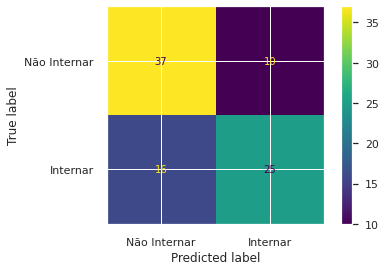

In [34]:
plotar_confusion_matrix(dados_limpos,modelo_logistico_dados_limpos)

Temos, para cada Label:

* VERDADEIRO POSITIVO (a pessoa precisa de UTI e o modelo acertou) **(VP)**
* VERDADEIRO NEGATIVO (Acerto quando a pessoa n√£o precisa de UTI)**(VN)**  
* FALSO POSITIVO (Quando minha label √© zero mas meu modelo diz que √© 1) **(FP)**
* FALSO NEGATIVO (Quando minha label √© um mas meu modelo diz que √© 0) **(FN)**

Isso significa que nosso modelo acertou 37 vezes os dados reais (verdadeiro positivo) no que tange a pacientes que n√£o precisariam de UTI, mas em compensa√ß√£o, erraram 10 vezes, classificando que os pacientes precisariam de UTI quando na verdade n√£o precisavam (falso posivitivo).<br>
Em baixo temos que meu modelos acertou 28 vezes quando o paciente realmente foi pra UTI e o modelo classificou isso (verdadeiro negativo). Contudo, errou 13 vezes quando classificou que algu√©m n√£o precisaria de UTI quando na verdade, o paciente precisou (falso negativo).<br>
Na minha opini√£o, pior do que uma UTI que coloca mais gente do que o  necess√°rio internado l√°, √© um modelo que classifica uma pessoa que realmente precisa de um leito e √© classificada como algu√©m que n√£o necessita.

A partir disso, podemos utilizar em v√°rias m√©tricas para nos aprofundarmos mais e buscar uma precis√£o melhor. Faremos isso, analisando os resultados para zeros e uns, afinal, estamos realizando uma classifica√ß√£o. A imagem abaixo, resumir√° os c√°lculos realizados pelo m√©todo apresentado abaixo.

<img src="https://miro.medium.com/max/550/1*t1vf-ofJrJqtmam0KSn3EQ.png">

Usando o `classification report` do Sklearn, podemos, passando os dados `y_test_lg` que s√£o os dados reais, junto da nossa predi√ß√£o de testes `predicao_lg_dados_limpos`, podemos conferir tais m√©tricas.

In [35]:
roda_modelo(modelo_logistico_dados_limpos,dados_limpos)

AUC: 0.8240788790866632

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        47
           1       0.72      0.71      0.72        41

    accuracy                           0.74        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.74      0.74      0.74        88



O que acontece √© que para valores 0 (zero - paciente n√£o precisa de UTI), possu√≠mos uma precis√£o de 74%, assim como para os valores iguais a 1 (um - paciente precisa de UTI). A import√¢ncia da **PRECIS√ÉO** se d√° pelo seguinte fato:

> *A precis√£o pode ser usada em uma situa√ß√£o em que os Falsos Positivos s√£o considerados mais prejudiciais que os Falsos Negativos.*

Isso quer dizer que a precis√£o ser√° importante para a situa√ß√£o em que estamos internando mais pacientes do que  o necess√°rio nas UTI's. Os falso positivos acabam que por lotar toda a estrutura de nosso hospital e consequentemente far√° com que as pessoas que realmente precisem, fiquem sem leito dispon√≠vel. Outro problema grav√≠ssimo √© o caso de pacientes que precisam de UTI, mas o modelo interpreta que n√£o necessitam. Neste caso, avaliamos pelo **RECALL**: 

> *O recall pode ser usada em uma situa√ß√£o em que os Falsos Negativos s√£o considerados mais prejudiciais que os Falsos Positivos.* 

Conforme o print acima, o recall ou sensibilidade, como tamb√©m √© conhecido, para os valores da classe zero possuem um desempenho maior  (79%) do que os da classe um (68%). Isso demonstra que nosso modelos Logistic Regression para o conjunto de dados `dados_limpos`, que √© o com maior quantidade de colunas, est√° sentindo um pouco de dificuldade em interpretar quem vai necessitar de UTI, em compara√ß√£o aos dados reais. <br>
Temos que o f1-Score nos mostrar, a partir de uma m√©dia harm√¥nica entre a precis√£o e o Recall, que est√° muito mais pr√≥xima dos menores valores do que uma m√©dia aritm√©tica simples. No caso da classe zero, seu valor √©  de 76% e da classe um, de 71%.

O valor AUC para este modelo est√° dando um valor igual a 74, semelhante ao que obitivemos no inicio.

Podemos ainda, visualizar nossos coeficientes usados neste modelo. Com a ajuda do  `Yellowbrick` podemos visualizar  a import√¢ncia dos atributos para o desempenho do modelo. Contudo, por conta da grande quantidade de dados, ficar√° dif√≠cil analisar corretamente. Talvez a grande quantidade de colunas possa ser um problema e `dados_limpos`pode n√£o ser o dataset mais adequado. Vejamos:

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


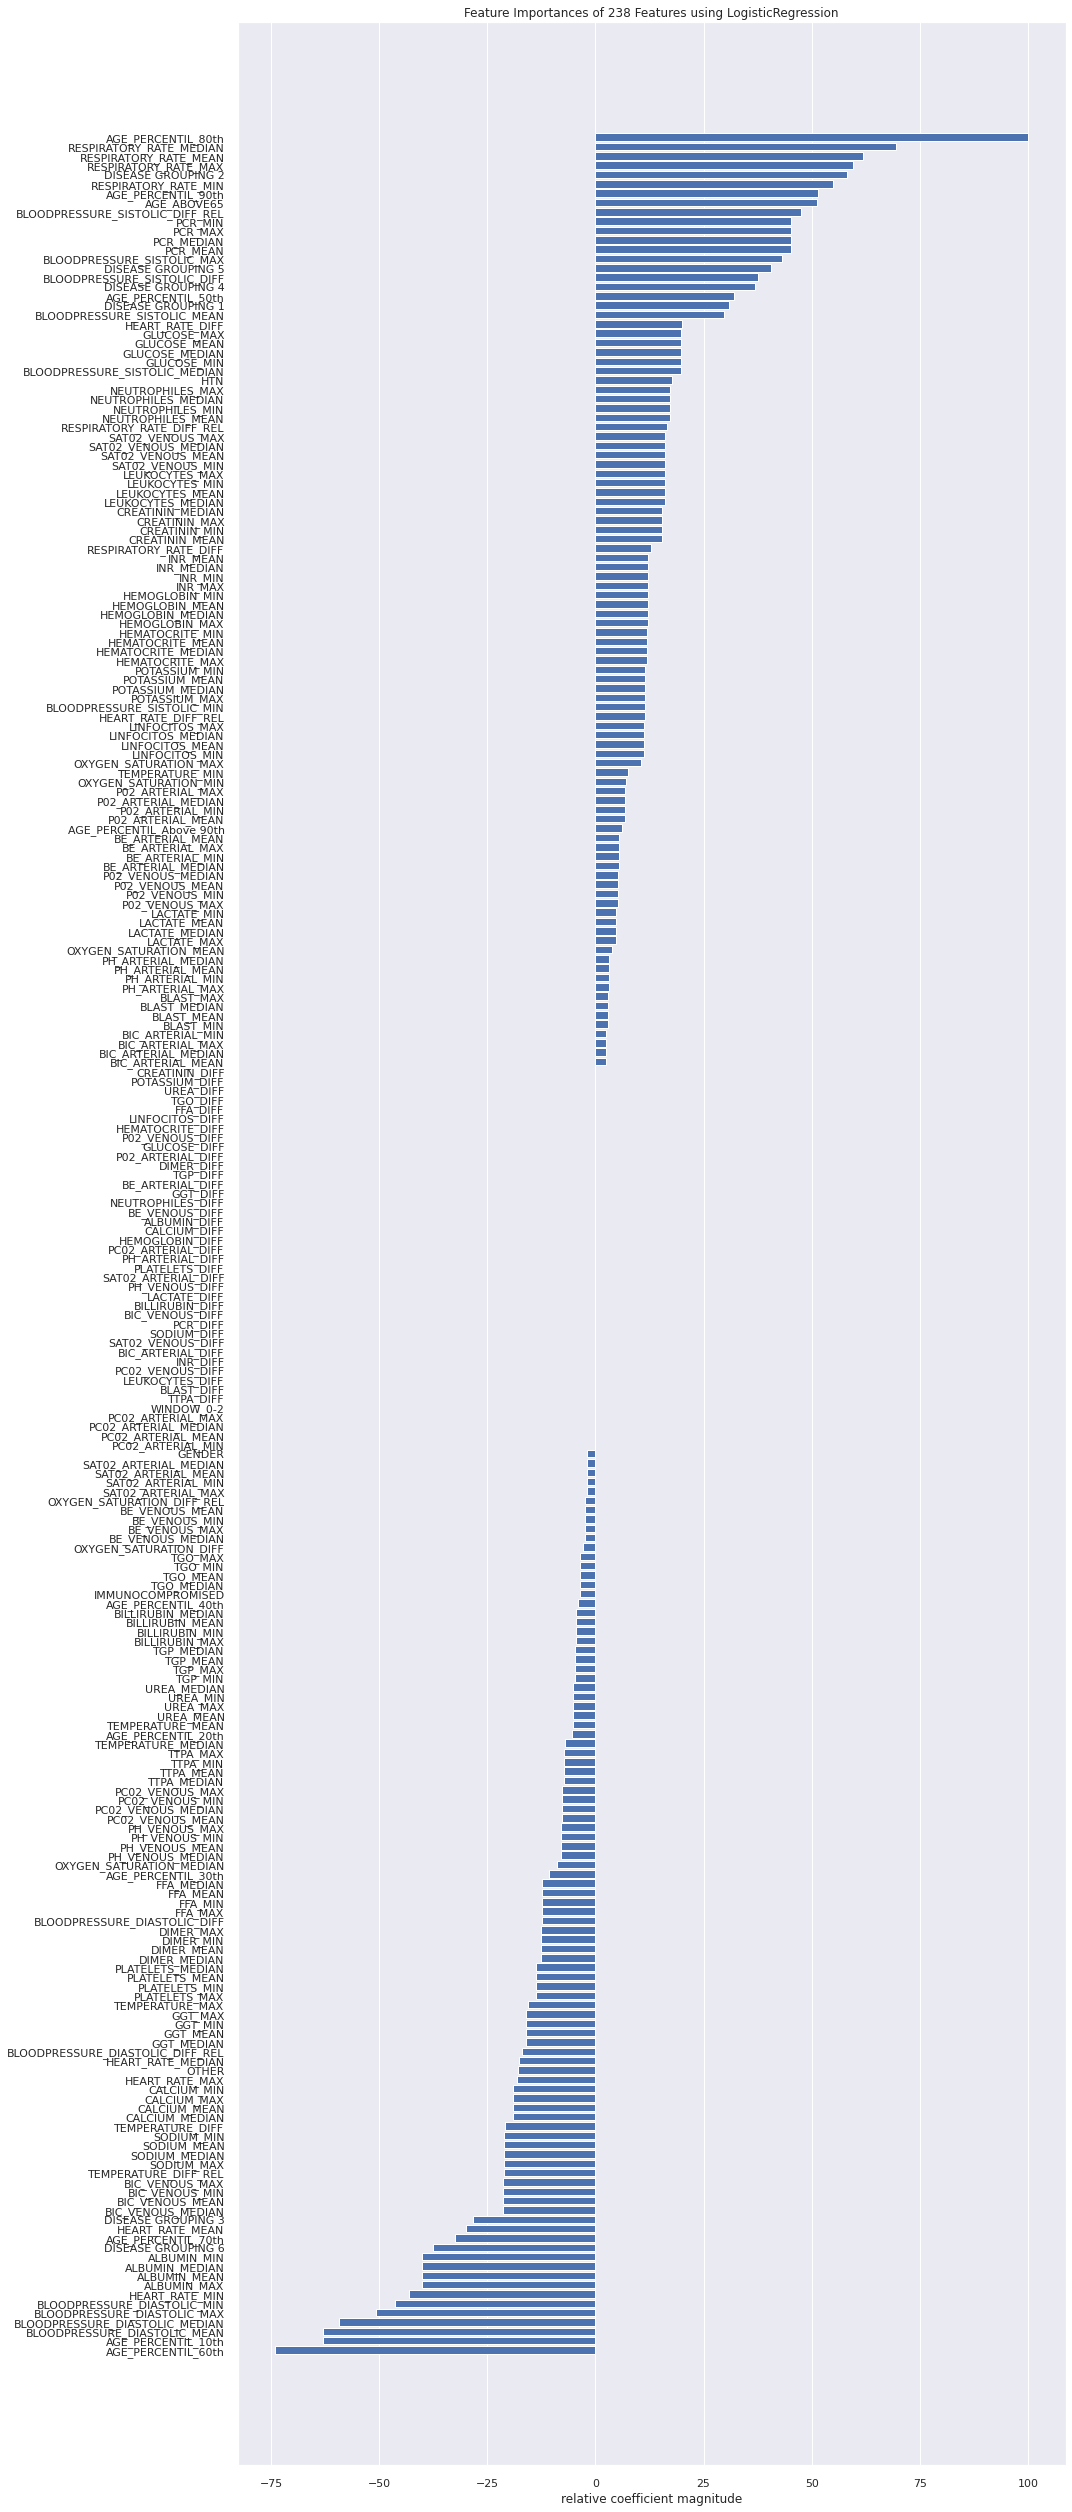

In [36]:
plotar_FeatureImportances(dados_limpos,modelo_logistico_dados_limpos)

A grande quantidade de colunas impacta em uma boa visualiza√ß√£o do gr√°fico sem que este n√£o fique cortado. <br>Este gr√°fico √© plotado a partir da utiliza√ß√£o da fun√ß√£o inversa de logit. Mais informa√ß√µes sobre o funcionamento desta fun√ß√£o voc√™ pode ler [aqui](https://monografias.ufma.br/jspui/bitstream/123456789/3572/1/LEANDRO-GONZALEZ.pdf).<br>
Se `AGE_PERCENTIL_Above_70th` for maior, o paciente tem mais chances de necessitar de uma UTI. Interpretando melhor em um cen√°rio do mundo real, mesmo n√£o sabendo o que `DISEASE GROUPING 3` contenha de doen√ßas agrupadas, temos que seria natural um paciente com idade acima de 70 anos precisar de interna√ß√£o, dados que pela sua idade avan√ßada, o metabolismo trabalhar de forma mais lenta, e que o sistema imunol√≥gico tamb√©m j√° n√£o possui o mesmo desempenho. Al√©m do mais.Fazendo de forma inversa, ao que tudo indica, a coluna `BLOODPRESSURE_DIASTOLIC_MEDIAN` tem um impacto menor na necessidade de interna√ß√£o na UTI.<br>
Vale resaltar que este gr√°fico refletem os dados de **TESTE**.

Plotando ent√£o a curva ROC o desempenho do modelo at√© agora. 
<br>
> **Observa√ß√£o**: A curva ROC mostra o qu√£o bom o modelo criado pode distinguir entre duas coisas (j√° que √© utilizado para classifica√ß√£o). Essas duas coisas podem ser 0 ou 1, ou positivo e negativo. Os melhores modelos conseguem distinguir com precis√£o o bin√¥mio.

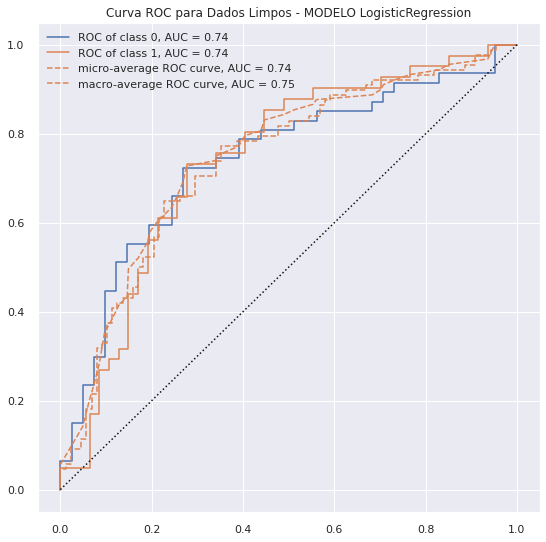

In [37]:
plotar_roc_auc(modelo_logistico_dados_limpos,dados_limpos, "Dados Limpos")

>**CURVA DE APRENDIZAGEM**

Para selecionar o melhor modelo para o seu projeto, quantos dados ser√£o necess√°rios? Uma curva de aprendizado pode nos ajudar a responder essa pergunta. O gr√°fico mostra as inst√¢ncias de treinamento e a pontua√ß√£o para valida√ß√£o cruzada √† medida que criamos modelos com mais amostras.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


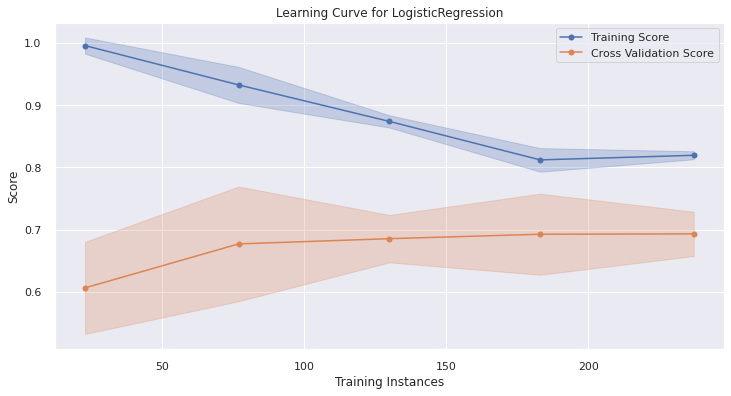

In [38]:
curva_aprendizagem(modelo_logistico_dados_limpos,dados_limpos)

No modelo Logistico, temos que conforme vamos adicionando mais dados nos trreinamentos (linha azul), nosso desempenho parece ir caindo mais. Em rela√ß√£o pontua√ß√£o de valida√ß√£o cruzada, conforme vamos adicionando mais valores no treinamento, mais ele vai crescendo, at√© indicar uma estacionaridade.  Pelo que podemos analisar pela variabilidade na √°rea laranja (√°rea sombreada), nosso modelo sofre de erros de bias ou est√° sofrendo de superadequa√ß√£o (ser um modelo complicado demais).

##### **DADOS LIMPOS SEM CORRELA√á√ÉO TIPO 2**
---

Realizando os mesmos procedimento feitos anteriormente em `dados_limpos`, teremos o seguinte.
<br>
<br>
Primeiro, a divis√£o dos dados para adequa√ß√£o ao Sklearn. Cria-se o conjunto de treinos e testes, mas agora, usando o dataframe `dados_limpos_sem_corr_tipo_2`.

In [39]:
modelo_logistico_dados_sem_corr = LogisticRegression(max_iter=1000000)

Treinamos o modelo log√≠stico agora com os dados de treino e logo depois realizamos sua predi√ß√£o. Por fim determinamos sua acur√°cia.

In [40]:
saber_acuracia(dados_limpos_sem_corr_tipo_2,modelo_logistico_dados_sem_corr)

A acur√°cia do Modelo Log√≠stico para dados_limpos √© de : 65.91 %


A acur√°cia apresentou um desemepenho inferior aos testes iniciais, mas por qu√™?<br>
Isso ocorre pelo fato de estarmos usando par√¢metros diferentes. Na fun√ß√£o usada inicialmente no treinamento de todos os modelos, utilizamos o m√©todo

```` 
StratifiedKFold(n_splits=5,shuffle=True)
````
que implica em uma stratifica√ß√£o dos dados em 5 cortes. Toda essa manipula√ß√£o implica no aumento da pontua√ß√£o do nosso modelo, pois este √© treinado mais adequadamente. Apesar de tudo isso, nosso foco de ir treinando os modelos e ir entendendo melhor desempenho aplicado as classes zero e um n√£o ser√° afetado.

Plotamos novamente a matriz de confus√£o e temos o seguinte:

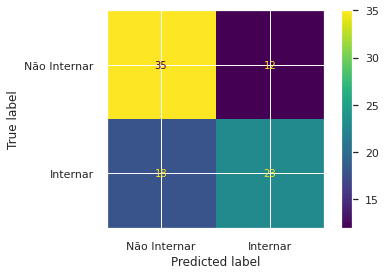

In [41]:
plotar_confusion_matrix(dados_limpos_sem_corr_tipo_2,modelo_logistico_dados_sem_corr)

Aqui, nossos valores indicam que acertamos 27 vezes quando era necess√°rio internar algu√©m na UTI, assim como acertamos 31 vezes quando n√£o dever√≠amos internar algu√©m na UTI. Por outro lado, o modelo errou 15 vezes com o caso de falso positivos que n√£o precisavam de UTI, mas o modelo acusou que precisavam assim como no caso de falsos negativos, pacientes que precisavam de UTI mas que o modelo acusou que n√£o precisavam, com o valor de 14 vezes.

O classification report nos mostra que as estimativas est√£o piores aqui do que em compara√ß√£o ao uso do dataframe `dados_limpos`. A precis√£o em ambas as classes est√° abaixo de 70%, assim como o recall. Lembrando que uma ajuda em  identificar os falsos positivos e outro para falso negativos. Ambos causam um grande problema na estrutura e logistica do hospital, al√©m do principal problema que √© **por vidas em risco**.

In [42]:
roda_modelo(modelo_logistico_dados_sem_corr,dados_limpos_sem_corr_tipo_2)

AUC: 0.8038401660612351

Classification Report
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        47
           1       0.72      0.71      0.72        41

    accuracy                           0.74        88
   macro avg       0.74      0.74      0.74        88
weighted avg       0.74      0.74      0.74        88



Veja que o valor AUC subiu pr√≥ximo a cada dos 80%. Tivemos uma melhora no modelo, apenas implementando um `n_iter` maior que padr√£o usando o dataframe `dados_limpos_sem_corr_tipo_2`.

Abaixo, plotamos novamente o gr√°fico mostrando a import√¢ncia das colunas para o modelo de Logistic Regression, usand os  dados de teste.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


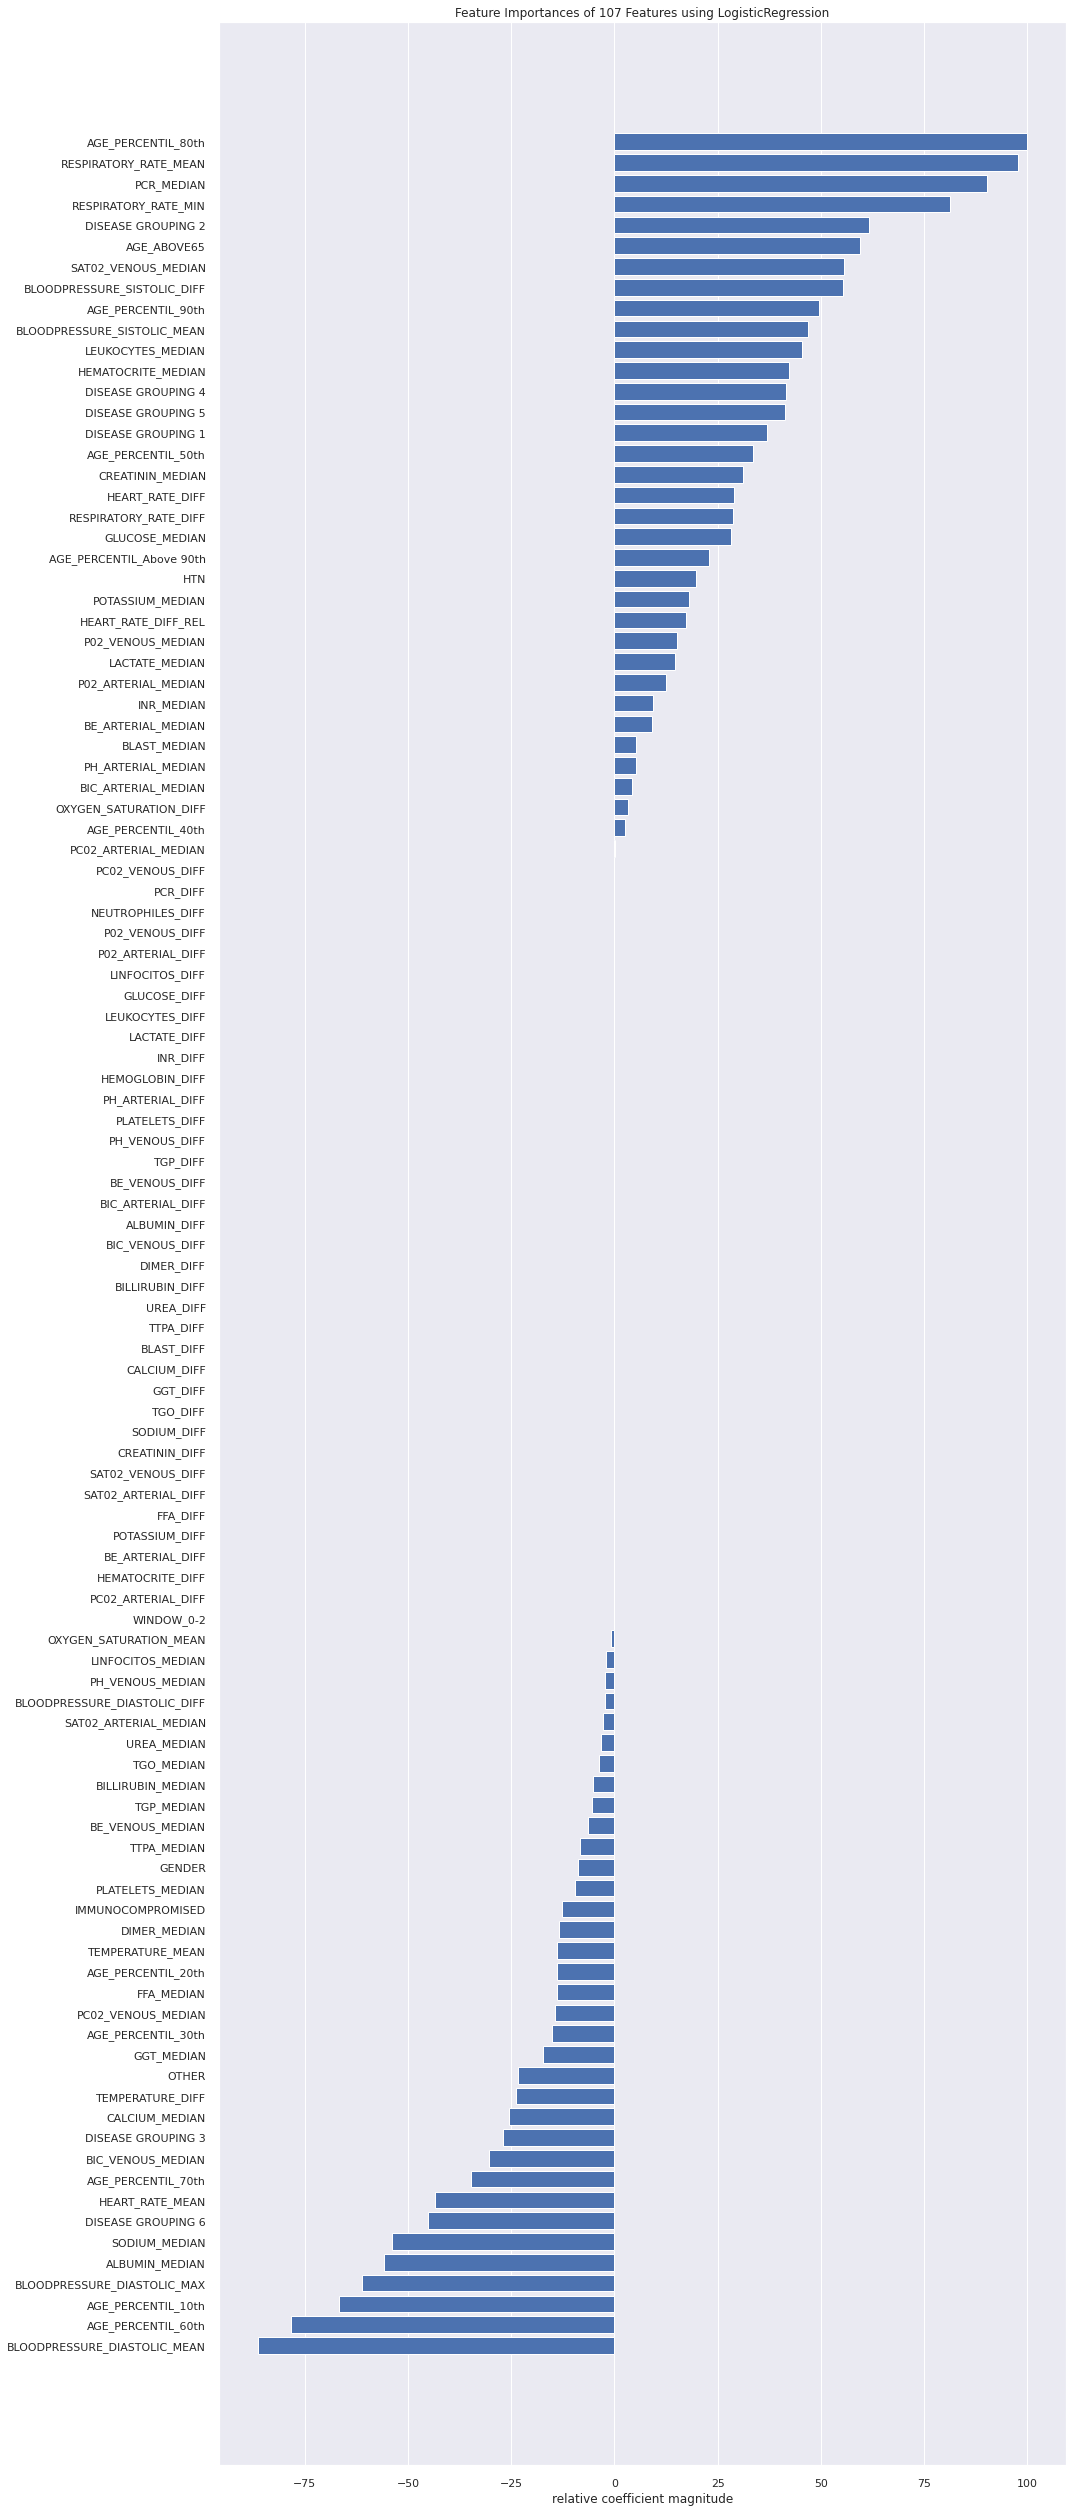

In [43]:
plotar_FeatureImportances(dados_limpos_sem_corr_tipo_2,modelo_logistico_dados_sem_corr)

Observe que diferente do gr√°fico que tivemos quando usamos o dataframe `dados_limpos`, aqui `AGE_PERCENTIL_50th` apresentou um coeficiente de magnitude positivo superior a 75, diferente de `BLOODPRESSURE_DIASTOLIC_MEAN`.

Plotamos aqui tamb√©m nossa curva ROC para termos uma ideia de como este conjunto de dados est√° se saindo.

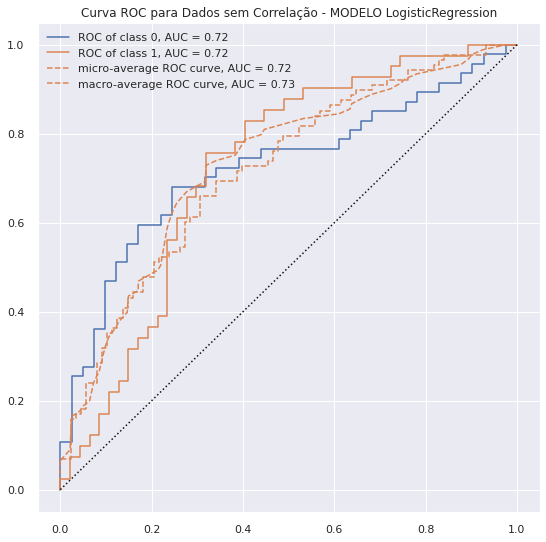

In [44]:
plotar_roc_auc(modelo_logistico_dados_sem_corr,dados_limpos_sem_corr_tipo_2,"Dados sem Correla√ß√£o")

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


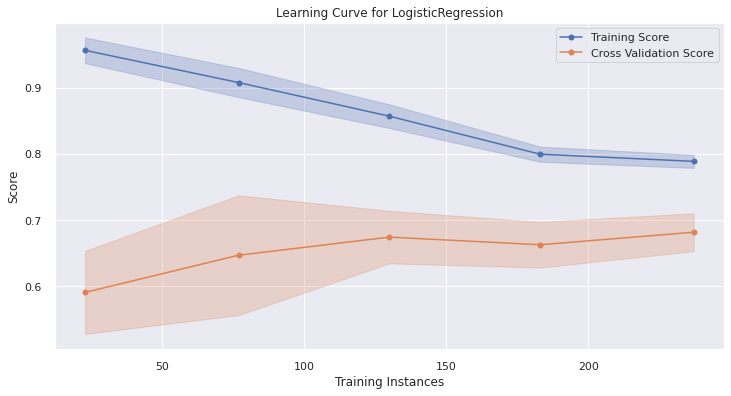

In [45]:
curva_aprendizagem(modelo_logistico_dados_sem_corr,dados_limpos_sem_corr_tipo_2)

Neste caso, com este conjunto de dados e sem modifica√ß√µes grandes nos hiperpar√¢metros do modelo, conforme vamos adicionando mais e mais dados, maior vai se tornando pontua√ß√£o da valida√ß√£o cruzada. Ainda assim, ele parece sofrer de superadequa√ß√£o.

## üìò RANDOM FOREST CLASSIFIER

Aplicaremos agora o modelo conhecido Random Forest Classifier e buscaremos analisar seu desempenho nos dois dataframes.

##### **DADOS LIMPOS**
---

Primeiramente, instanciamos a classe, mas desde j√° passamos um `n_estimators  = 100 ` que servir√° para evitar uma superadequa√ß√£o dos dados.

In [116]:
modelo_random_dados_limpos = RandomForestClassifier(n_estimators=100)

Desde de j√°, vejamos sua acur√°cia:

In [118]:
saber_acuracia(dados_limpos,modelo_random_dados_limpos)

A acur√°cia do Modelo Log√≠stico para dados_limpos √© de : 65.91 %


Voc√™ deve ter precebido que esse modelo demora um pouquinho mais para executar certo? Esse √© uma das desvantagens dele.

Vejamos como sua matriz de confus√£o se comporta

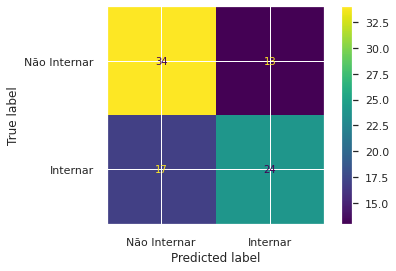

In [119]:
plotar_confusion_matrix(dados_limpos,modelo_random_dados_limpos)

Diferente dos modelos em Logistic Regression, aqui podemos notar uma mudan√ßa sifgnificativa na contagem de acertos para pacientes que n√£o devem ser internados. Contudo, para pacientes que devem ser internados (nosso foco aqui), o valor parece continuar parecido com os casos anteriores.

In [120]:
roda_modelo(modelo_random_dados_limpos,dados_limpos)

AUC: 0.8087701089776854

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        47
           1       0.70      0.80      0.75        41

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.76      0.75      0.75        88



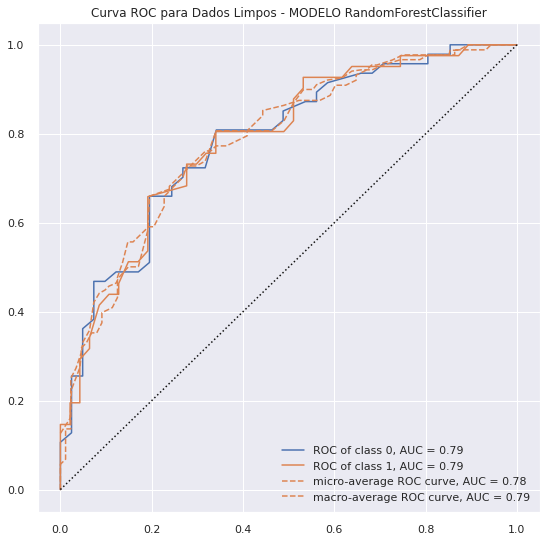

In [50]:
plotar_roc_auc(modelo_random_dados_limpos,dados_limpos,"Dados Limpos")

Com o resultado da curva AUC acima, podemos notar que a forma como este modelo vem desempenhando ainda depende de hiperpar√¢metros mais ajustados ao seu individualismo. Precisamos especificar cada vez mais o modelo. Para isso, realizaremos uma otimiza√ß√£o em seus par√¢metros.

> **CURVA DE VALIDA√á√ÉO** para o modelo **RandomForestClassifier**

Como Matt Harisson define em seu livro *Machine Learning - Guia de Refer√™ncia R√°pida*, curva de valida√ß√£o:
> √â uma forma de determinar um valor apropriado para um hiperpar√¢metro que mostra como o desemepnho do modelo responde a mudan√ßas no valor do hiperpar√¢metro.


Nosso objetivo √© descobrir bons valores para o hiperpar√¢metro **max_depth**, respons√°vel pela **profundidade** da √°rvore.
Vejamos ent√£o como ele se comporta em um valor de 1 at√© 15:

><font color='red'> **OBSERVA√á√ÉO**: **OS VALORES DO EIXO-Y N√ÉO INICIAM NO VALOR 0 , POIS OS GR√ÅFICOS S√ÉO GERADOS AUTOMATICAMENTE E,PRESSUP√ïE-SE QUE MOSTRAR A PARTIR DE UM VALOR IGUAL A 0.6 OU 60% (COMO NO NOSSO CASO)  TORNA A VISUALIZA√á√ÉO MELHOR PARA OS RESULTADOS. ISSO SE REFLETIR√Å EM TODOS OS PLOTS DE CURVA DE VALIDA√á√ÉO E CURVA DE APRENDIZAGEM** </font>

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


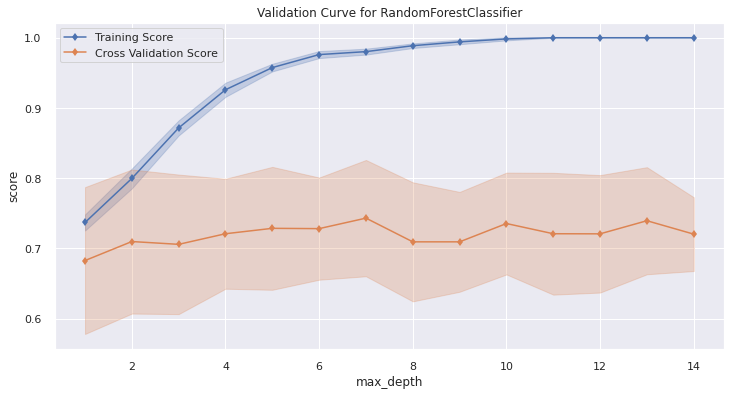

In [51]:
curva_validacao(modelo_random_dados_limpos, dados_limpos,15,'max_depth')

Em azul temos a ponta√ß√£o de treino, que a cada valor max_depth vai se aproximando de 1.00 ou 100% de pontua√ß√£o, levando a um **overfitting**. Isso significa que o modelo se ajusta tanto ao modelo de treinamento que beira a perfei√ß√£o. Parece at√© bom mas na pr√°tica n√£o √©, pois visualizando a linha laranja, que representa nossos dados de teste, ficamos sempre entre o invervalo de  65 a 75 de pontua√ß√£o. 
<br>
A pontua√ß√£o dos dados de valida√ß√£o nos permitem inferir como o modelo responderia a dados n√£o previstos anteriormente. No geral, buscamos um hiperpar√¢metro que maximize a pontua√ß√£o da valida√ß√£o dos dados.
<br>
Dado a an√°lise, o melhor max_depth para o modelo √© **max_depth = 11** para o *RandomForestClassifier*.


Analisando o n√∫mero m√≠nimo de amostras em cada folha (`min_samples_leaf`).

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


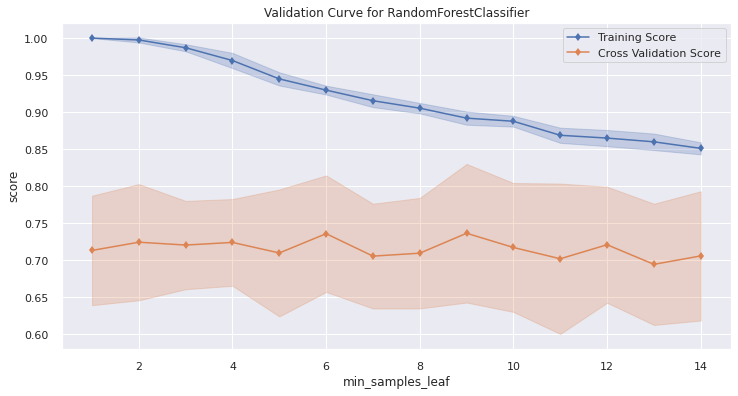

In [52]:
curva_validacao(modelo_random_dados_limpos, dados_limpos,15,'min_samples_leaf')

setar o par√¢metro para 8 parece ser uma boa ideia.

Conferindo agora o `min_samples_split`, que vem a ser o n√∫mero m√≠nimo de amostras para separar um n√≥.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


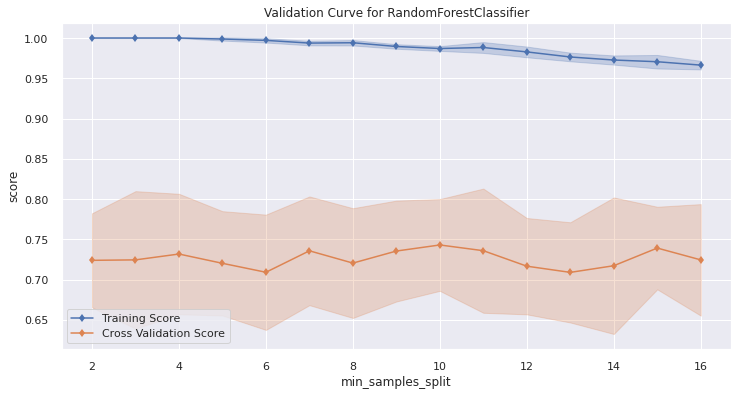

In [53]:
curva_validacao(modelo_random_dados_limpos, dados_limpos,17,'min_samples_split')

O valor setado para 13 nos parece ser uma boa op√ß√£o.

Analisnado a curva de aprendizagem agora.

Possu√≠mos uma quantidade pequena de dados para trabalhar. Com a curva vemos que nossos modelos vai precisando de mais dados com o tempo. A curva em azul, que √© a pontua√ß√£o de treinamento, deixa claro que n√£o precisar√≠amos de mais dados para treinamento, diferente da linha laranja que indica os dados de valida√ß√£o.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


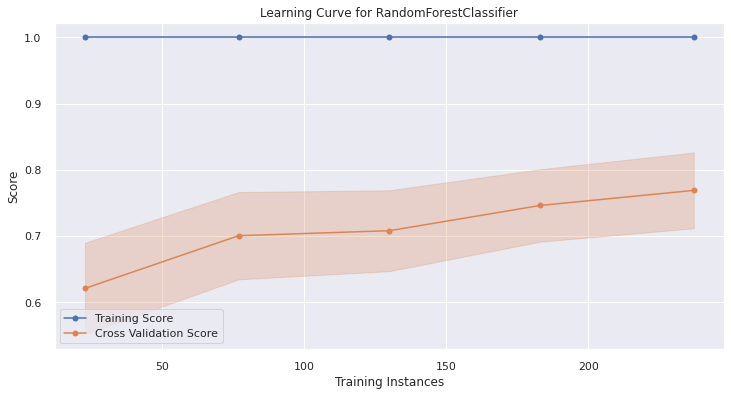

In [54]:
curva_aprendizagem(modelo_random_dados_limpos,dados_limpos)

Ao que tudo indica, com os valores no padr√£o em que est√° at√© o momento, o modelo se encaminha para uma superadequa√ß√£o e isso o torna mais complicado.

##### **DADOS SEM CORRELA√á√ÉO TIPO 2**
---

Agora, realizaremos os mesmos processos para estes conjunto de dados. Isso significa que muitas coisas n√£o ser explicadas novamente. Vamos nos ater aos resultados.

In [55]:
modelo_random_dados_limpos_gondinni = RandomForestClassifier(n_estimators=100)

In [56]:
saber_acuracia(dados_limpos_sem_corr_tipo_2,modelo_random_dados_limpos_gondinni)

A acur√°cia do Modelo Log√≠stico para dados_limpos √© de : 65.91 %


Primeiramente,  nossa acur√°cia aponta um valor abaixo do que fora demonstrado quando rodamos este mesmo modelo, sem nenhuma modifica√ß√£o, na primeira vez.

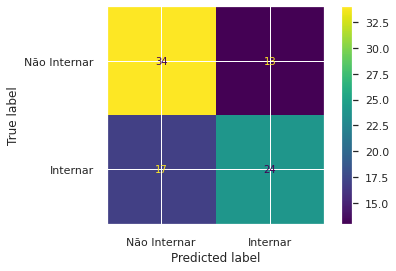

In [57]:
plotar_confusion_matrix(dados_limpos_sem_corr_tipo_2,modelo_random_dados_limpos_gondinni)

Contudo, analisando para este dataset, notamos que o n√∫mero de acertos dos dados previstos e os dados reais para pacientes que necessitam de interna√ß√£o foi menor do que no dataframe `dados_limpos`,assim como na predi√ß√£o de pacientes falso positivos que foi maior.

In [58]:
roda_modelo(modelo_random_dados_limpos_gondinni,dados_limpos_sem_corr_tipo_2)

AUC: 0.8087701089776854

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        47
           1       0.70      0.80      0.75        41

    accuracy                           0.75        88
   macro avg       0.75      0.75      0.75        88
weighted avg       0.76      0.75      0.75        88



Observe que o valor AUC para o modelo que usa este dataframe, foi maior que o modelo que usa o outro dataframe.

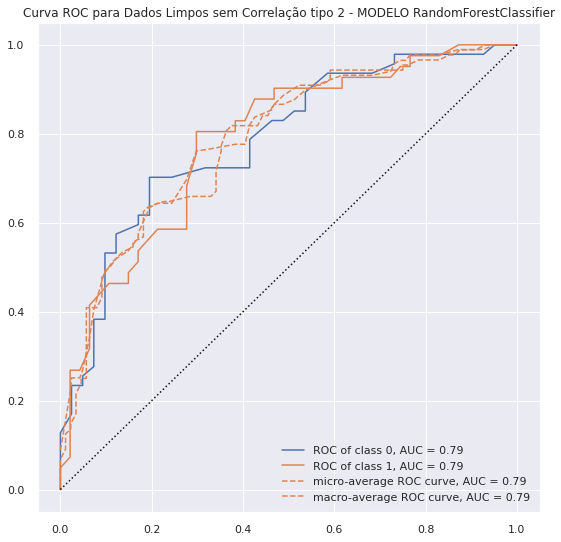

In [59]:
plotar_roc_auc(modelo_random_dados_limpos_gondinni,dados_limpos_sem_corr_tipo_2,"Dados Limpos sem Correla√ß√£o tipo 2")

Sua curva Roc tamb√©m apresentou desempenho melhor. 

Agora, analisando os hiperpar√¢metros `max_depth`, `min_samples_leaf` e `min_samples_split` temos que: 

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


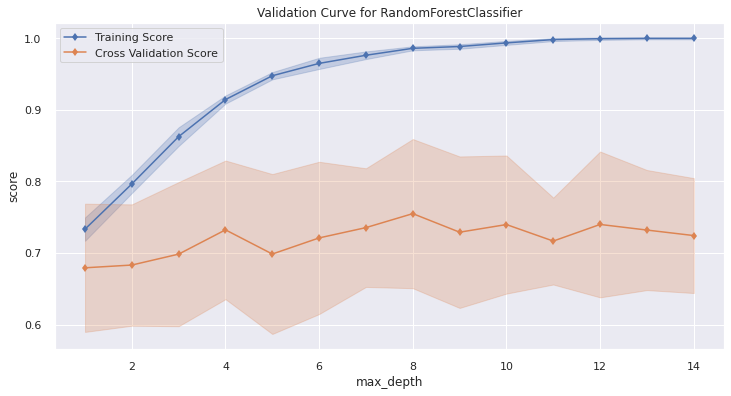

In [60]:
curva_validacao(modelo_random_dados_limpos_gondinni, dados_limpos_sem_corr_tipo_2,15,'max_depth')

O melhor valor para usarmos parece ser 14 tanto para `max_depth` quanto para `min_samples_leaf`.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


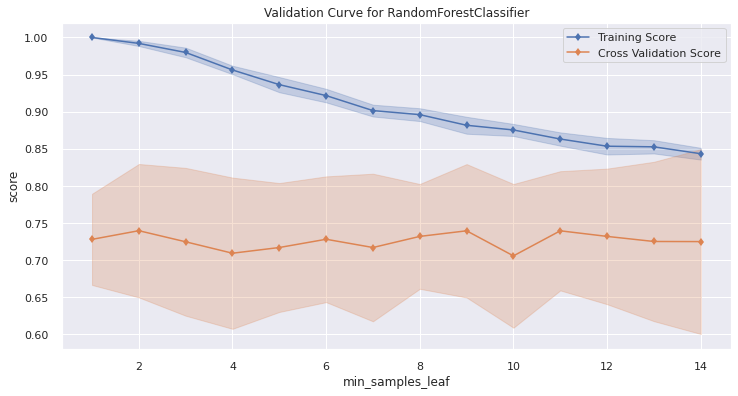

In [61]:
curva_validacao(modelo_random_dados_limpos_gondinni, dados_limpos_sem_corr_tipo_2,15,'min_samples_leaf')

Para `min_samples_split`, o melhor valor aparenta ser 10.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


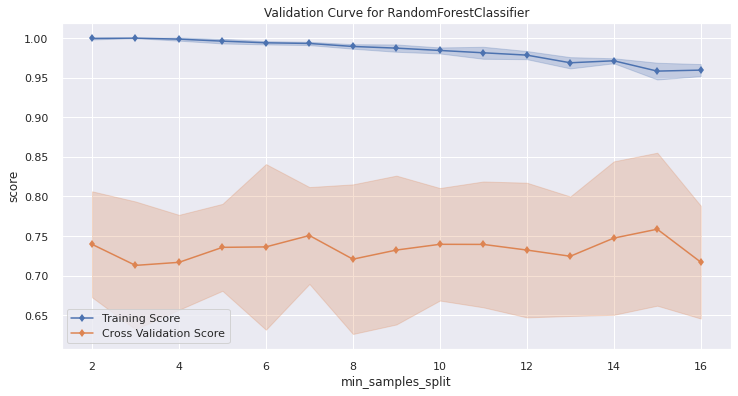

In [62]:
curva_validacao(modelo_random_dados_limpos_gondinni, dados_limpos_sem_corr_tipo_2,17,'min_samples_split')

Para a curva de aprendizagem, fica claro que precisamos de mais dados.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


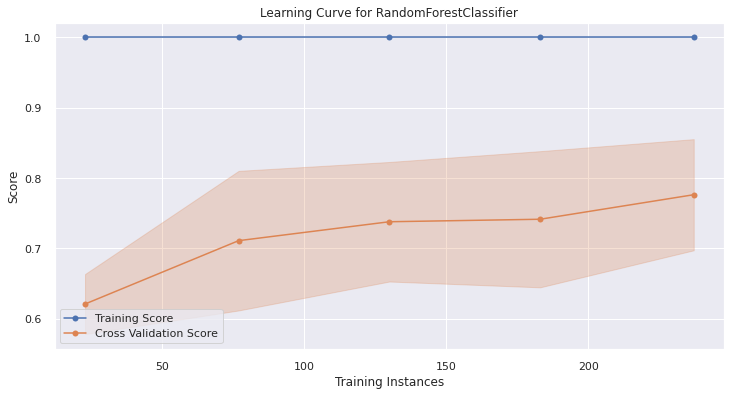

In [63]:
curva_aprendizagem(modelo_random_dados_limpos_gondinni,dados_limpos_sem_corr_tipo_2)

Quanto a curva de aprendizado, observe que 

## üìò XGBOOST CLASSIFIER

Por √∫ltimo mas n√£o menos importante, iremos trabalhar com o modelo XGBoost. Este modelo n√£o faz parte do conjunto d Sklearn mas tamb√©m √© muito bom e robusto. Aqui, o processo tamb√©m ser√° semelhante aos casos anteriores. 

##### **DADOS LIMPOS**
---

Come√ßamos ent√£o instanciando a classe e passando um estimador igual a 100 (que j√° vem por padr√£o, mas que √© bom explicitar). Al√©m disso, passo tamb√©m, um `n_jobs` igual a menos um (-1). Isso significa que, para ter um maior ganho de performance, o modelo usar√° todas as threads dispon√≠veis na CPU.

In [64]:
modelo_xgboost_dados_limpos = XGBClassifier(n_estimators=100,n_jobs=-1)

A acur√°cia inicial do modelo √© baixa, como podemos analisar.

In [65]:
saber_acuracia(dados_limpos,modelo_xgboost_dados_limpos)

A acur√°cia do Modelo Log√≠stico para dados_limpos √© de : 69.32 %


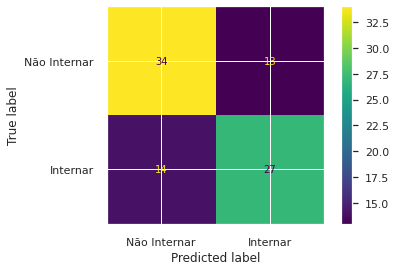

In [66]:
plotar_confusion_matrix(dados_limpos,modelo_xgboost_dados_limpos)

Sua matriz de confus√£o √© semelhante a do random forest de `dados_limpos_sem_corr_tipo_2`. At√© ent√£o, n√£o temos nada demais.

In [67]:
roda_modelo(modelo_xgboost_dados_limpos,dados_limpos)

AUC: 0.773741567202906

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        47
           1       0.63      0.71      0.67        41

    accuracy                           0.67        88
   macro avg       0.67      0.67      0.67        88
weighted avg       0.68      0.67      0.67        88



Com rela√ß√£o as m√©tricas de precis√£o para os valores de classe 0, temos um desempenho menor que os modelos Logistic Regression. O recall dele indica que est√° conseguindo identificar em 71% os casos de falsos positivos.

Quanto a sua curva ROC, ele demonstra uma boa margem de crescimento.

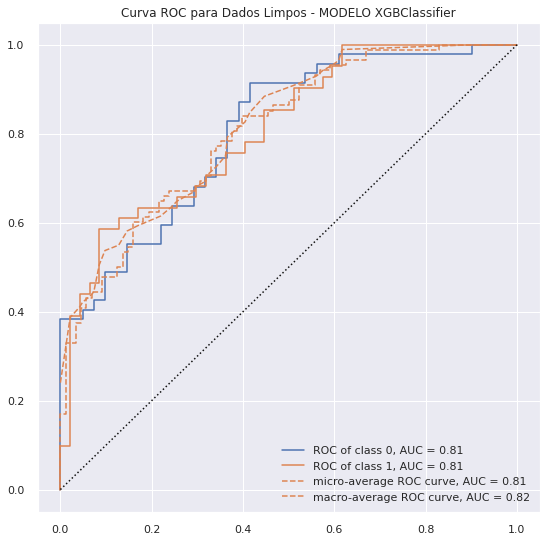

In [68]:
plotar_roc_auc(modelo_xgboost_dados_limpos,dados_limpos,"Dados Limpos")

Buscando entender quais as m√©tricas ser√£o boas para ele, aplicamos a fun√ß√£o apenas para max_depth que √© referente a profundida m√°xima da √°rvore, profundida demais pode gerar um sistema super especializado nos dados de treinamento, tamb√©m conhecido como overfitting. Profundida de menos vai diminuir a capacidade de generaliza√ß√£o do modelo.

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


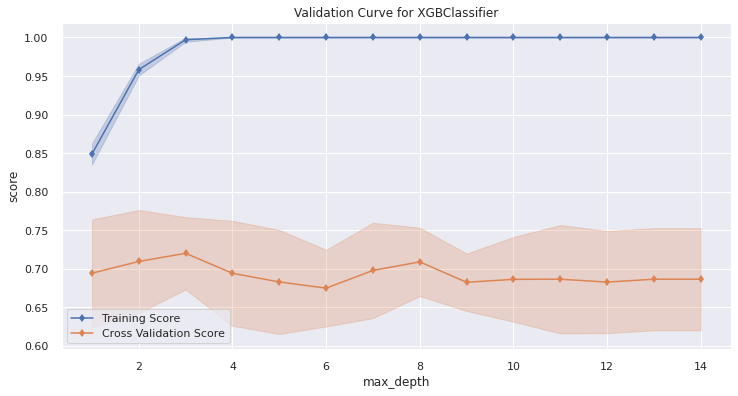

In [69]:
curva_validacao(modelo_xgboost_dados_limpos, dados_limpos,15,'max_depth')

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


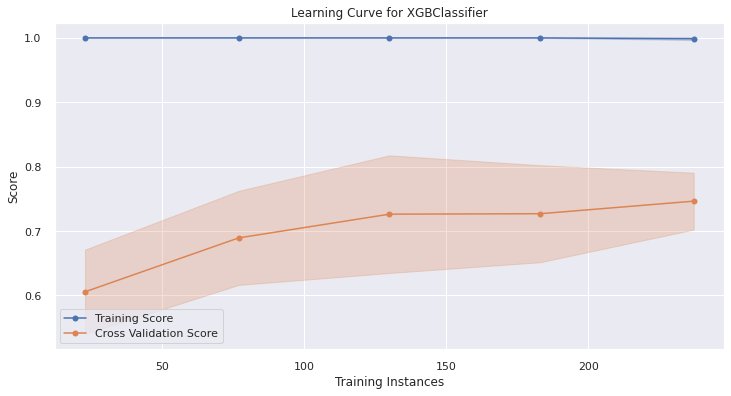

In [70]:
curva_aprendizagem(modelo_xgboost_dados_limpos,dados_limpos)

Com rela√ß√£o a curva de aprendizagem, o modelo pede por mais dados. Assim, ele vem a ter um desepenho melhor.
<br>
Um fator importante que esta biblioteca possue √© fato de plotar quais colunas apresentam maior import√¢ncia no momento em que est√£o rodando. Abaixo, voc√™ pode vizualizar quais colunas est√£o sendo mais importantes e sua "pontua√ß√£o" de import√¢ncia.

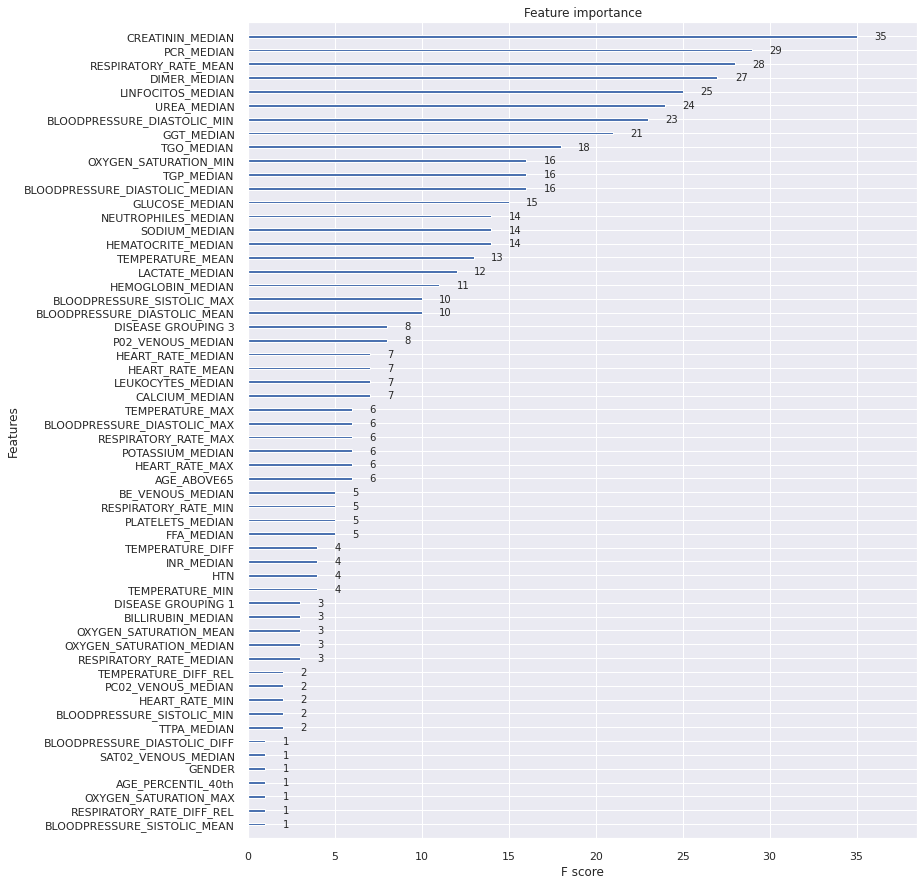

In [71]:
import xgboost as xgb

fig,ax = plt.subplots(figsize=(12,15))
xgb.plot_importance(modelo_xgboost_dados_limpos,ax = ax)
plt.show()

Podemos ainda, tentar descobrir quais par√¢metros, melhor desempenham no nosso modelo XGBoost. Com o aux√≠lio do Grid Search CV, iremos passar um dicion√°rio com os hiperpar√¢metros que desejamos em nosso modelo. Iremos ent√£o buscar o melhor estimador para os valores passados e no fim, plotarei o tempo em segundos para executar tudo isso e  pontua√ß√£o no formato `roc_auc` para os dados de Treino e Teste, al√©m do melhor modelo que ele conseguiu gerar com os hiperpar√¢metros.

In [108]:
param_grid_usado = {
            "max_depth": [5,8,10,20],
            "n_estimators": [25, 50, 100,200,1000],
            'min_child_weight':[4,5,6],
            'objective':['binary:logistic'],
            'gamma':[i/10.0 for i in range(0,4)]

}

In [109]:
buscar_melhor_parametro(dados_limpos,modelo_xgboost_dados_limpos,param_grid_usado)

Tempo execu√ß√£o: 279.06682896614075 segundos

TREINO :1.00 
TESTE :0.79 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


Perceba que demora um certo tempo para que ele rode tudo. A ideia por tr√°s disso √© ter uma ideia do que torna o modelo melhor, por isso precisamos testar possibilidades que possam criar at√© mesmo uma certa demora. N√£o significa que um modelo final resulte nisso, apenas que para encontrarmos os valores mais adequados, a paci√™ncia ter√° que ser nossa amiga.<br>
<br>
**Observa√ß√£o**: Por que n√£o apliquei isso nos modelos anteriores? 
<br> Simples. Aplicando isso nos modelos anteriores, demor√≠amos de minutos a horas, apenas pra descobrir as melhores combina√ß√µes. Buscando evitar isso, separei a t√©cnica apenas para o XGBoost Classifier, que √© uma biblioteca muito rica e que exige de n√≥s um pouco mais de conhecimento sobre Machine Learning. 

Assim, com os resultaodos, vamos ver se far√° ou n√£o alguma diferen√ßa, usar esses parametros.
* modelo_teste_xgb_ds = modelo teste xgboost dados limpos

In [112]:
modelo_teste_xgb_ds =  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Ao executar esse modelo novo, com tudo que nos fora indicado a por, temos este resultado.

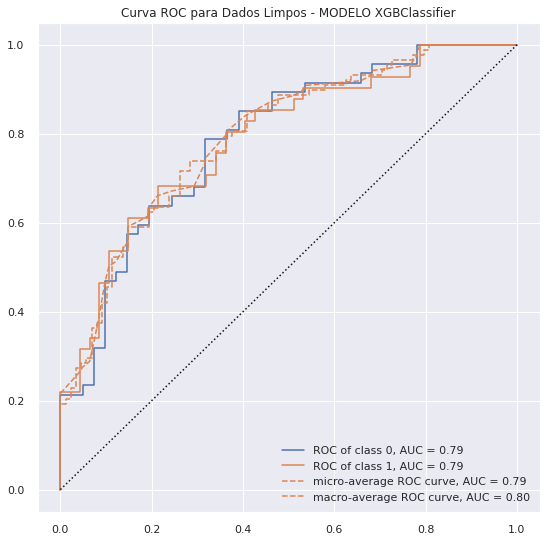

In [113]:
plotar_roc_auc(modelo_teste_xgb_ds,dados_limpos,"Dados Limpos")

E, originalmente, sem mexer em par√¢metros, e apenas passar n_estimador = 100 e n_jobs = -1 , tivemos isso:

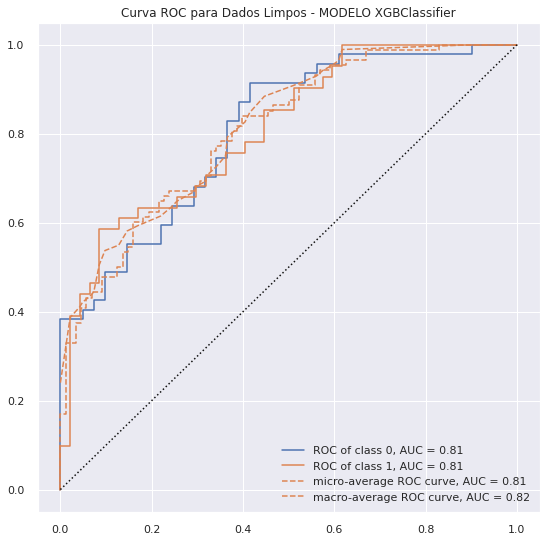

In [76]:
plotar_roc_auc(modelo_xgboost_dados_limpos,dados_limpos,"Dados Limpos")

Ou seja, ao que tudo indica, a pouca mudan√ßa que realizamos nos dados  orignalmente teve um efeito mais positivo do que o contr√°rio. 

##### **DADOS SEM CORRELA√á√ÉO TIPO 2**
---

Iremos repetir os processos mas agora usando outro conjunto de dados.

In [77]:
modelo_xgboost_gondinni = XGBClassifier(n_estimators=100,n_jobs=-1)

In [78]:
saber_acuracia(dados_limpos_sem_corr_tipo_2,modelo_xgboost_gondinni)

A acur√°cia do Modelo Log√≠stico para dados_limpos √© de : 72.73 %


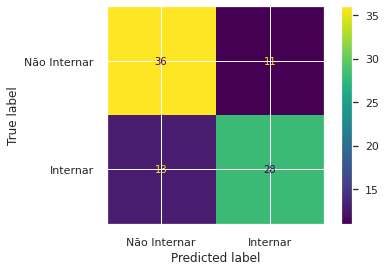

In [79]:
plotar_confusion_matrix(dados_limpos_sem_corr_tipo_2,modelo_xgboost_gondinni)

Com esse conjunto de dados, tivemos um desempenho minimamente superior.

In [80]:
roda_modelo(modelo_xgboost_gondinni,dados_limpos_sem_corr_tipo_2)

AUC: 0.766476388168137

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        47
           1       0.62      0.73      0.67        41

    accuracy                           0.67        88
   macro avg       0.68      0.67      0.67        88
weighted avg       0.68      0.67      0.67        88



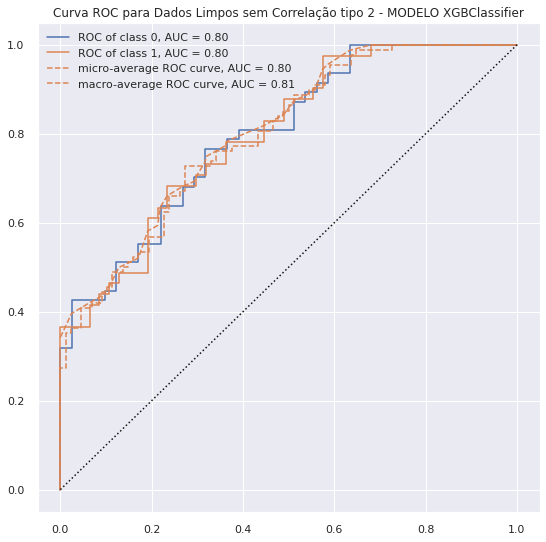

In [81]:
plotar_roc_auc(modelo_xgboost_gondinni,dados_limpos_sem_corr_tipo_2,"Dados Limpos sem Correla√ß√£o tipo 2")

Aplicarei novamente a tentativa autom√°tica da escolha de par√¢metros. 

In [105]:
param_grid_usado = {
            "max_depth": [5,8,10,20],
            "n_estimators": [25, 50, 100,200,1000],
            'min_child_weight':[4,5,6],
            'objective':['binary:logistic'],
            'gamma':[i/10.0 for i in range(0,4)]

}

In [107]:
buscar_melhor_parametro(dados_limpos_sem_corr_tipo_2,modelo_xgboost_gondinni,param_grid_usado)

Tempo execu√ß√£o: 279.27634596824646 segundos

TREINO :1.00 
TESTE :0.79 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


At√© mesmo seu gr√°fico apresentou um desempenho um pouco menor que o modelo com os `dados_limpos`.

# üìä VALIDA√á√ÉO CRUZADA

Realizamos uma an√°lise dos modelos logo acima, mas faltou apenas tratar da quest√£o da genereliza√ß√£o dos dados. Para evitar que nosso modelo vicie e quando chegue na pr√°tica, sofra pra tirar algum proveito, aplicaremos a valida√ß√£o cruzada, definida como:

> Cross-validation (Valida√ß√£o cruzada) √© uma t√©cnica para avaliar a capacidade de generaliza√ß√£o de um modelo, a partir de um conjunto de dados. √â fundamental em problemas onde o objetivo da modelagem √© a predi√ß√£o.

Busca-se estimar o qu√£o preciso √© um modelo na pr√°tica, ou seja, o seu desempenho em um novo conjunto de dados.

Idealmente, o modelo deve ser avaliado em amostras que n√£o foram usadas para construir ou ajustar o modelo, de modo que forne√ßam um senso imparcial de efic√°cia do modelo. Quando uma grande quantidade de dados est√° √† m√£o, um conjunto de amostras pode ser reservado para avaliar o modelo final - este √© o set de teste - que n√£o deve ser tocado at√© esta avalia√ß√£o final. O set de treinamento √© usado  para criar o modelo, enquanto o set de valida√ß√£o √© usado para ajustar o desempenho.


## **DADOS_LIMPOS**

##### Logistic Regression

In [82]:
roda_modelo_cv(modelo_logistico_dados_limpos,dados_limpos,5,10)

AUC: 0.7476269316565368 -  0.8707788239215362


(0.7476269316565368, 0.8707788239215362)

##### Random Forest Classifier

In [83]:
roda_modelo_cv(modelo_random_dados_limpos,dados_limpos,5,10)

AUC: 0.7879505986249409 -  1.0


(0.7879505986249409, 1.0)

XGBoost Classifier

In [84]:
roda_modelo_cv(modelo_xgboost_dados_limpos,dados_limpos,5,10)

AUC: 0.7722890534074744 -  0.9999786843568655


(0.7722890534074744, 0.9999786843568655)

## **DADOS_LIMPOS_SEM_CORR_TIPO_2**

##### Logistic Regression

In [85]:
roda_modelo_cv(modelo_logistico_dados_sem_corr,dados_limpos_sem_corr_tipo_2,5,15)

AUC: 0.7499815545210281 -  0.857666744884829


(0.7499815545210281, 0.857666744884829)

##### Random Forest Classifier

In [86]:
roda_modelo_cv(modelo_random_dados_limpos_gondinni,dados_limpos_sem_corr_tipo_2,5,15)

AUC: 0.7932943544621176 -  1.0


(0.7932943544621176, 1.0)

XGBoost Classifier

In [87]:
roda_modelo_cv(modelo_xgboost_gondinni,dados_limpos_sem_corr_tipo_2 ,5,15)

AUC: 0.7698108844490422 -  0.9999329304671579


(0.7698108844490422, 0.9999329304671579)

Rodado os modelos, conclu√≠-se que:

**Melhor Modelo**:
* **Random Forest Classifier**

**Melhor conjunto de dados**:
* **dados_sem_corr_tipo_2**


Iremos melhorar um pouco mais esse modelo e extrair um pouco mais de performance. Mesmo que melhorando um pouco, j√° ser√° de grande ajuda e pode futuramente ser aperfei√ßoado.

##Melhorando modelo selecionado

Com base neste [artigo](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/), iremos implementar hiperpar√¢metros que geralmente aux√≠liam em um melhor desempenho neste modelo.
<br>
Aplicaremos os seguintes par√¢metros:

```

RandomForestClassifier(n_estimators=1000,
                       n_jobs=-1,
                       max_depth=4,
                       min_samples_leaf=6,
                       min_samples_split=6,
                       max_samples = 0.3,
                       max_leaf_nodes = 25)

```                                                    

A partir daqui, irei chamar as mesmas fun√ß√µes (com uma leve mudada em seu c√≥digo no final), al√©m da cria√ß√£o de uma classe que ser√° usada para a implementa√ß√£o do pipeline.

### Pipeline
---

O pipeline nos auxiliar√° em reduzir o c√≥digo e aplicar de forma mais organizada o uso dos nossos modelos. Vejamos sua cria√ß√£o abaixo.

Importarei essas duas classes aqui pois ficar√° mais f√°cil de compreender o processo que aplicaremos. O pipeline ser√° usado para que possamos organizar nossos m√©todos de aplica√ß√£o de forma mais organizada. Com rela√ß√£o a BaseEstimador e TransformerMixin, temos, conforme mostra a documenta√ß√£o oficial:
> A pe√ßa central do transformador, do regressor e do classificador √© `sklearn.base.BaseEstimator`. Todos os estimadores em scikit-learn s√£o derivados desta classe. Em mais detalhes, esta classe base permite definir e obter par√¢metros do estimador.

Quanto ao TransformerMixin:
>Transformers s√£o estimadores de scikit-learn que implementam um m√©todo. ao criar um transformador, voc√™ precisa criar uma classe que herda tanto do `sklearn.base.baseestimator` quanto do `sklearn.base.transformerMixin`.

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

Definimos uma classe que aplicar√° a mesma fun√ß√£o de limpar os dados e remover colunas com alta taxa de correla√ß√£o.

In [98]:
class RemoverCorr(BaseEstimator,TransformerMixin):
    def __init__( self, valor_corte = 0.95):
        self.valor_corte = valor_corte

    def fit( self, X, y = None ):
        matrix_corr = X.iloc[:,4:].corr().abs()
        matrix_upper = matrix_corr.where(np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool))
        self.excluir = [coluna for coluna in matrix_upper.columns if any(matrix_upper[coluna] > self.valor_corte)]
        return self 
        
    def transform(self, X, y = None):
        X = X.drop(self.excluir, axis=1)
        return X

Criamos uma fun√ß√£o que funciona semelhantemente a fun√ß√£o que aplicamos anteriormente para descobrir qual modelo se saiu melhor. A diferen√ßa √© que agora, adicionamos a vari√°vel pipeline que recebe uma classe Pipeline e essa recebe uma lista com tuplas. `cat_selector` ser√° respons√°vel pela remo√ß√£o dos dados correlacionados, enquanto que  `modelo` ser√° respons√°vel por receber o modelo que passamos nos par√¢metros da fun√ß√£o `roda_modelo_cv_pipeline`. 

In [99]:
def roda_modelo_cv_pipeline(modelo, dados, n_splits, n_repeats):

    np.random.seed(1354537)
    dados = dados.sample(frac=1).reset_index(drop=True)
    x_columns = dados.columns
    y = dados["ICU"]
    x = dados[x_columns].drop(["ICU"], axis=1)

    pipeline = Pipeline([('cat_selector', RemoverCorr()),
                         ('Modelo', modelo)])    

    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats)
    resultados=cross_validate(pipeline, x, y, cv=cv, scoring='roc_auc', return_train_score=True,n_jobs=-1)

    auc_medio = np.mean(resultados['test_score'])
    auc_medio_treino = np.mean(resultados['train_score'])

    auc_std = np.std(resultados['test_score'])

    print(f'AUC  {auc_medio}')

Vamos aplicar toda a execu√ß√£o dos dados. Desde a chamada dos dados diretamente do github onde est√£o os dados, passando na manipula√ß√£o dos dados, limpando e preechendo os dados ausentes, aplicando o filtro na coluna `WINDOW`e `ICU`, realizando as querys de colunas a remover. Aplicando o `get_dummies` para transformar os dados categ√≥ricos, instanciando ao Modelo, junto de seus par√¢metros , rodando a fun√ß√£o e retornando o scoring `roc_auc` e o tempo de execu√ß√£o.

>**Observa√ß√£o**: Apesar do nome da vari√°vel `dados_limpos`, esta n√£o √© a mesma que `dados_limpos` usado ao longo de todo o projeto. Esta √© uma vari√°vel nova gerada com a aplica√ß√£o do m√©todo de limpeza de dados com alto n√≠vel de correla√ß√£o - T√âCNICA GONDINNI.

In [115]:
dados_original = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
start_time = time.time()
np.random.seed(45438)

dados_limpos = preenche_tabela(dados_original)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos.dropna(inplace=True)
dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_limpos = pd.get_dummies(dados_limpos)
dados_limpos = remove_corr_var(dados_limpos)

melhor_random_dados_limpos = RandomForestClassifier(n_estimators=1000,
                                                    n_jobs=-1,
                                                    max_depth=4,
                                                    min_samples_leaf=6,
                                                    min_samples_split=6,
                                                    max_samples = 0.3,
                                                    max_leaf_nodes = 25)

roda_modelo_cv_pipeline(melhor_random_dados_limpos,dados_limpos,5,10)
print("\033[1m" + f"Tempo de execu√ß√£o: {(time.time() -  start_time )}  secs." + "\033[0m")

AUC  0.8079591523341526
Tempo de execu√ß√£o: 83.31744122505188  secs.


Temos no fim, um scoring igual a 80.61%. com um tempo de execu√ß√£o pr√≥ximo aos 83 segundos ou aproximadamente 1 minuto e 30 segundos para executar todo.

Apenas por curiosidade, tamb√©m apliquei os mesmos m√©todos ao modelo XGBoost. Usando as configura√ß√µes recomendadas pelo `GridSearchCV`. Os resultados para este conjunto de dados `dados_limpos_sem_corr_tipo_2`foram selecionados.

```
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
```              

Vejamos ent√£o como ele desempenha.


In [111]:
dados_original = pd.read_excel("https://github.com/alura-cursos/covid-19-clinical/blob/main/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx?raw=true")
start_time = time.time()
np.random.seed(45438)

dados_limpos = preenche_tabela(dados_original)
a_remover = dados_limpos.query("WINDOW=='0-2' and ICU==1")['PATIENT_VISIT_IDENTIFIER'].values
dados_limpos = dados_limpos.query("PATIENT_VISIT_IDENTIFIER not in @a_remover")
dados_limpos.dropna(inplace=True)
dados_limpos = dados_limpos.groupby("PATIENT_VISIT_IDENTIFIER").apply(prepare_window)
dados_limpos = pd.get_dummies(dados_limpos)
dados_limpos = remove_corr_var(dados_limpos)

melhor_xgboost_dados_limpos = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.3,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=200, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

roda_modelo_cv_pipeline(melhor_xgboost_dados_limpos,dados_limpos,5,10)
print("\033[1m" + f"Tempo de execu√ß√£o: {(time.time() -  start_time )}  secs." + "\033[0m")

AUC  0.7746681564938145
Tempo de execu√ß√£o: 15.460039854049683  secs.


Seu AUC foi menor que o modelo **RandomForestClassifier**, contudo, seu tempo de execu√ß√£o foi menor.

#CONCLUS√ÉO

#REFER√äNCIAS

[Sklearn - Modelos Lineares](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

[Regress√£o Log√≠stica - Prof. Adriana Silva](https://www.youtube.com/watch?v=dcsZsA_wipE&ab_channel=EstaTiDados)

[Modelos de Predi√ß√£o | Regress√£o Log√≠stica](https://medium.com/turing-talks/turing-talks-14-modelo-de-predi%C3%A7%C3%A3o-regress%C3%A3o-log%C3%ADstica-7b70a9098e43)
[edisciplinas - usp](https://edisciplinas.usp.br/pluginfile.php/3769787/mod_resource/content/1/09_RegressaoLogistica.pdf)

[Sklearn - 1.9 Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)

[Data Geeks - Classifica√ß√£o com Naive Bayes](https://www.datageeks.com.br/naive-bayes/)


[Modelos de Predi√ß√£o| SVM](https://medium.com/turing-talks/turing-talks-12-classifica%C3%A7%C3%A3o-por-svm-f4598094a3f1)

[Creating a simple binary SVM classifier with python and Scikit-learn](https://www.machinecurve.com/index.php/2020/05/03/creating-a-simple-binary-svm-classifier-with-python-and-scikit-learn/#choosing-a-kernel-function)


[Entendendo classificadores de florestas aleat√≥rias em Python](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

[XGBoost: A Scalable Tree Boosting System](https://arxiv.org/pdf/1603.02754.pdf)

[Regress√£o Log√≠stica e suas aplica√ß√µes](https://monografias.ufma.br/jspui/bitstream/123456789/3572/1/LEANDRO-GONZALEZ.pdf)

[M√©tricas de Avalia√ß√£o: acur√°cia, precis√£o, recall‚Ä¶ quais as diferen√ßas?](https://medium.com/@vitorborbarodrigues/m%C3%A9tricas-de-avalia%C3%A7%C3%A3o-acur%C3%A1cia-precis%C3%A3o-recall-quais-as-diferen%C3%A7as-c8f05e0a513c#:~:text=O%20recall%20pode%20ser%20usada,prejudiciais%20que%20os%20Falsos%20Positivos.&text=O%20F1%2DScore%20%C3%A9%20simplesmente,e%20recall%20em%20alguma%20situa%C3%A7%C3%A3o.)

[Um guia de iniciantes para sintoniza√ß√£o de hiperparmetro florestal aleat√≥ria](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/)

In [88]:
print("\033[1m" + f"Este Google Colab levou : {(time.time() -  tempo_inicial )//60} Minutos para executar todo. Muito Obrigado!" + "\033[0m")

Este Google Colab levou : 14.0 Minutos para executar todo. Muito Obrigado!
